In [1]:
import pandas
import matplotlib
import datetime

In [2]:
import coin_repository
import strategies

In [3]:
def get_interests(coin_repository, days=30):
    coin_df = coin_repository.get_data_frame(duration=500)
    closes = coin_df['close']
    interest_dict = {}
    for i in closes.keys():
        j = i - datetime.timedelta(days)
        if closes.get(j) is None:
            continue
        interest = (closes[i] / closes[j])
    #     print(i, closes[i], closes[j], interest)
        interest_dict[i] = interest
        
    return pandas.Series(interest_dict) 
#월별 수익률을 시리즈로 리턴한다.

In [4]:
# 1
# get_interests(coin_repository.CoinRepository('ETH'))

In [5]:
# get_interests(coin_repository.CoinRepository('ETH'), days=31)

In [6]:
# get_interests(coin_repository.CoinRepository('ETH'), 30)

In [7]:
# df = pandas.DataFrame({
#     'ETH': get_interests(coin_repository.CoinRepository('ETH')),
#     'BTC': get_interests(coin_repository.CoinRepository('BTC')),
#     'XRP': get_interests(coin_repository.CoinRepository('XRP')),
#     'BCH': get_interests(coin_repository.CoinRepository('BCH')),
#     'EOS': get_interests(coin_repository.CoinRepository('EOS')),
#     'XLM': get_interests(coin_repository.CoinRepository('XLM')),
#     'LTC': get_interests(coin_repository.CoinRepository('LTC')),
#     'ADA': get_interests(coin_repository.CoinRepository('ADA')),
#     'MIOTA': get_interests(coin_repository.CoinRepository('MIOTA')),
#     'USDT': get_interests(coin_repository.CoinRepository('USDT'))
# })

In [8]:
import numpy

# coins = ['ETH', 'BTC', 'XRP']
coins = ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']

coin_dict = {}

for coin in coins:
    coin_dict[coin] = get_interests(coin_repository.CoinRepository(coin))
df = pandas.DataFrame(coin_dict)
# print(df['ETH'])

coins_with_interests = []
key_day = df.tail(1).index.item()
for x in coins:
    # TODO : 코드 리펙토링 필요
    if not key_day in df[x].keys():
        print(f"{x} coin does not have a record at {key_day}.")
        continue
    a = df[x][key_day]
    if not numpy.isnan(a):
        coins_with_interests.append((x, df[x][key_day]))
        
coins_with_interests

[('ETH', 0.5874422668830358),
 ('BTC', 0.9357392368450329),
 ('XRP', 0.5833769479169468),
 ('BCH', 0.637560818190845),
 ('EOS', 0.5721331689272503),
 ('XLM', 0.9118472815305471),
 ('LTC', 0.6442080378250592),
 ('ADA', 0.6087702891402657),
 ('MIOTA', 0.40735963302752287),
 ('USDT', 1.0008617419598274)]

In [9]:
df[coins].mean(axis=1).plot()

In [10]:
# for x in ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']:    
#     if not numpy.isnan(a):
#         coins_with_interests.append((x, df[x][df.tail(1).index.item()]))
# print(coins_with_interests)

In [11]:
# def getKey(row):
#     return row[1] 

# sorted(coins_with_interests, key=getKey, reverse=True)



In [12]:
import numpy

# coins = ['ETH', 'BTC', 'XRP']
coins = ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']

coin_dict = {}

for coin in coins:
    coin_dict[coin] = get_interests(coin_repository.CoinRepository(coin))
    # 시계열 데이터 -> 시리즈, 엑셀같이 하나의 테이블 -> 데이터프레임
    # 코인별 월별 수익률을 데이터프레임으로 보이기
df = pandas.DataFrame(coin_dict)
# print(df['ETH'])

ms = 1.0
for d in pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M'):
    coins_with_interests = []
    for x in coins:
        if not key_day in df[x].keys():
            print(f"{x} coin does not have a record at {d.date()}.")
            continue
        a = df[x][d.date()]
        if not numpy.isnan(a):
            coins_with_interests.append((x, df[x][d.date()]))
    ranked_coins = [k for (k, v) in sorted(coins_with_interests, key=lambda row: row[1], reverse=True) if not numpy.isnan(v)][:3]
    # list comprehension
    m = ms / 3
    
    

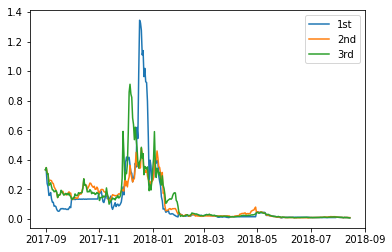

In [13]:
import numpy

# coins = ['ETH', 'BTC', 'XRP']
coins = ['ETH', 'BTC', 'XRP', 'BCH', 'EOS', 'XLM', 'LTC', 'ADA', 'MIOTA', 'USDT']

coin_dict = {}

for coin in coins:
    coin_dict[coin] = get_interests(coin_repository.CoinRepository(coin))
df = pandas.DataFrame(coin_dict)

ms = 1.0

ranks = [{}, {}, {}]

for d in pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M'):
    coins_with_interests = []
    for x in coins:
        if not key_day in df[x].keys():
            print(f"{x} coin does not have a record at {d.date()}.")
            continue
        a = df[x][d.date()]
        if not numpy.isnan(a):
            coins_with_interests.append((x, df[x][d.date()]))
    ranked_coins = [k for (k, v) in sorted(coins_with_interests, key=lambda row: row[1], reverse=True) if not numpy.isnan(v)][:3]
    cs = [coin_dict[coin] for coin in ranked_coins]
    m = ms / 3
    newms = 0
    
    index = 0
    for c in cs:
        start_date = d.date()
        end_date = (start_date + pandas.tseries.offsets.MonthEnd(1)).date()

        initial_value = c[start_date]
        while start_date in c.keys() and start_date < end_date:
            current_value = c[start_date]
            interest = current_value / initial_value * m
            ranks[index][start_date] = interest
            start_date += datetime.timedelta(days=1)
            
        newms += interest
        index += 1
    ms = newms

pandas.DataFrame({
    '1st': ranks[0],
    '2nd': ranks[1],
    '3rd': ranks[2]
}).plot()

In [14]:
pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M')

DatetimeIndex(['2017-08-31 19:10:24.081296', '2017-09-30 19:10:24.081296',
               '2017-10-31 19:10:24.081296', '2017-11-30 19:10:24.081296',
               '2017-12-31 19:10:24.081296', '2018-01-31 19:10:24.081296',
               '2018-02-28 19:10:24.081296', '2018-03-31 19:10:24.081296',
               '2018-04-30 19:10:24.081296', '2018-05-31 19:10:24.081296',
               '2018-06-30 19:10:24.081296', '2018-07-31 19:10:24.081296'],
              dtype='datetime64[ns]', freq='M')

In [15]:
# for d in pandas.date_range(end=datetime.datetime.now(), periods=12, freq='M'):
#     print((d + pandas.tseries.offsets.MonthEnd(1) - datetime.timedelta(days=1)).date())

In [16]:
# start_date = datetime.datetime(2017,8,1).date()
# end_date = (start_date + pandas.tseries.offsets.MonthEnd(1)).date()
# while start_date < end_date:
#     print(start_date)
#     start_date = (start_date + datetime.timedelta(days=1))

In [17]:
print(coin_repository.CoinRepository('ETH'))

In [ ]:
import random
class CoinIterator:
    def __init__(self):   
        pass
    def __iter__(self):
        return self
    
    def __next__(self):
        return random.random()

c = CoinIterator()
for i in c:
    print(i)

0.7502553499947634
0.07766545958076088
0.39452575489958164
0.05258732115477649
0.2673954104425247
0.3550899712821831
0.14439400199562868
0.10075526512419497
0.8250212603274543
0.8074883392164098
0.1838520731130261
0.19129898050263183
0.1781623212930622
0.9147714440154276
0.6834510697858603
0.3288931017840311
0.8834080348039423
0.7459215612517143
0.9468614350035212
0.7563169967352926
0.6518645475880888
0.9601597257706929
0.5877706137382467
0.021014142434223837
0.16770463801344326
0.19922655237480313
0.14479399136853421
0.2320320118871102
0.2061457386508151
0.12393319600430575
0.6711408773853721
0.5539961670178817
0.8818906500213779
0.24013511806920573
0.0147661638380574
0.27858216562850857
0.3714210649036629
0.9124126243045212
0.2673704221235762
0.3370809112274238
0.4759890433408971
0.07560753166725365
0.8838589499628432
0.6973702738564529
0.6608019895043677
0.9157369961442913
0.994894267164045
0.9971754049198258
0.08176042973649056
0.051808204975955285
0.7129051907639348
0.067637791489

0.46215455830823127
0.1622381407165996
0.2747839353808318
0.4522482357248494
0.8127914209162558
0.06263790162684635
0.5498372972724758
0.3077690277954249
0.27748508448445564
0.0803901611947091
0.1742373077462518
0.17532138517364992
0.05413185365634654
0.22284596978910953
0.7526292430098245
0.7084594376182585
0.712426042544742
0.860942262235561
0.9588175177145605
0.08631756241635657
0.7833918836631392
0.43184020947545154
0.523202525023552
0.4356459722194348
0.48754599592454273
0.39131951052118263
0.4241332762305777
0.16124828644735445
0.33423099548084767
0.6675937723694079
0.9298781085727669
0.6116603145822502
0.8663744511915417
0.1797102867028051
0.5846811504956618
0.6455682351724841
0.909691604050932
0.002439839800017052
0.903720215412558
0.2456863243446752
0.43063174791545256
0.01027817095980943
0.6174753466529797
0.2424907151223692
0.5881611557275163
0.026295872523264263
0.9662770160403594
0.03606729828668598
0.9120740832868138
0.5960730329403943
0.3673554512270958
0.891315483467241

0.3051111460736593
0.8645566923412519
0.2770631458764494
0.6268204331945576
0.7483987735910788
0.09234173416478375
0.02312935114299597
0.7167392106519467
0.852834989450126
0.09192820080655761
0.04313023231922963
0.8457512253510272
0.12375976049998583
0.9773486005495925
0.40291146937350264
0.8263759998120036
0.23331902298684437
0.6165509786930576
0.7649246843168919
0.9435262887590237
0.9735777291036776
0.04502775548403981
0.39450089874444205
0.569291229276824
0.32733153413303107
0.09669466830785389
0.8240487605002883
0.6890546364924969
0.6264501264014362
0.34161650342534666
0.687253885517254
0.401753018534049
0.24825103226363332
0.7126088686858972
0.032884708316613276
0.4943494710192292
0.3253250016740291
0.46520461841823957
0.37020320332436407
0.24792220800852127
0.7731697238537616
0.08698566686974474
0.873553151958947
0.365928187709592
0.2514657415478917
0.8795851759347117
0.9146495705862829
0.7303051251268113
0.5396936607208751
0.9253555387763756
0.08650501038089176
0.728020721098200

0.32619110701864684
0.224774599292358
0.9510047721771541
0.4324890464034564
0.4365856463219323
0.2585011244363046
0.15929886672896032
0.5125281315835962
0.3715249023105558
0.7421724335155064
0.21901505697536272
0.4946341565408048
0.46671965097730017
0.20870355554019848
0.9774292950750927
0.3551283719320385
0.25386405850252847
0.37805120235851597
0.6956983330411649
0.9025772817039024
0.15407467855152202
0.5781452915740535
0.2885679068578879
0.06883339933979349
0.21975287351501516
0.5210275111501382
0.9239673560012698
0.851646757626814
0.22012353595398737
0.7519001997154479
0.7997403132854778
0.9393077229383846
0.5266394568152758
0.703254661013049
0.4978936660729565
0.4657542105033511
0.939605091555848
0.2362226207554211
0.49980398078258403
0.9635227853082641
0.5434733389686829
0.5785341510467902
0.418437067868518
0.5437381608113118
0.23300172952011633
0.7053707456326874
0.04886633825957021
0.1464152464373567
0.15135635861772168
0.14867527741890407
0.1438033293247205
0.9914375075234798
0

0.8725964691998443
0.25554304532757244
0.35903267386880267
0.1576709473108563
0.11537700545677232
0.3555696032531993
0.241257279214252
0.14507392953832887
0.28080197603304746
0.052258017500065645
0.2898157630262349
0.05993121924746081
0.1529461320995823
0.20238679705891083
0.7805322475717704
0.7650542828109015
0.7536744593585905
0.660278394456921
0.047154922939533384
0.4847422024170037
0.15588328498082316
0.24473433213601103
0.022684109838994493
0.8130007767695575
0.2704640400380972
0.5845934415820352
0.6136801616661813
0.6617256687947387
0.9929041459003612
0.019845961529735612
0.04170047744025707
0.17312643454692334
0.12076840549635026
0.33577565991785807
0.3667255434794674
0.5458739021304495
0.7268450746940114
0.5842304599057846
0.4792238459764967
0.462047652755765
0.6200901694415157
0.720545604081904
0.813630573741825
0.5951743144175028
0.33652718597958275
0.11383570304927548
0.7716944051611766
0.1368646348985727
0.745676559882843
0.24259112802238625
0.1339404293582489
0.15687611452

0.25334945390378394
0.3744488074900846
0.2233105821145791
0.09015354350923488
0.023234828819856612
0.5012888765568264
0.45954009494481984
0.454974111647939
0.09479784800921953
0.3897412116567216
0.5825852519176693
0.9966442279448533
0.06679020109348766
0.58034978466298
0.2553673614427264
0.7994775243846939
0.5202201997481248
0.8469127681155728
0.5355437505420876
0.34132628006173427
0.6775800931051453
0.0447905367511342
0.47102654977136804
0.5829286177041217
0.23146967641107408
0.8410839106998313
0.14631499244158486
0.9014540392234829
0.04028137457050107
0.3533051842395125
0.05120643590705776
0.6139638378673921
0.8412535976864741
0.14530492982052268
0.4431485510018862
0.9354614272320055
0.45705648932747966
0.0488868018676184
0.3266614762639106
0.9159326904484704
0.8429664968735512
0.09860788193086145
0.051723697942668956
0.8338403375739946
0.3009297148419755
0.8562634379410627
0.12415480819746949
0.8406670245800267
0.42436741313033344
0.39264889555775695
0.20753221941891054
0.0665809478

0.3878897353281108
0.8268188594201384
0.5286231491822397
0.6620892743797626
0.7247542293246082
0.22541815923573638
0.12552917746579328
0.6725756868172381
0.9280202807861929
0.11381033546036623
0.9937110009438176
0.4039555630966857
0.19410132025489601
0.5628046284061905
0.06550655685002571
0.5129153145127346
0.8396778425600373
0.14430767782891119
0.6109348572790723
0.6630909829958689
0.5719821039269212
0.07274285885252696
0.5703122774192768
0.6575018516667639
0.8293205799924279
0.7697040202595922
0.03887190440215493
0.3767626156728745
0.34188774878388917
0.5817647378693684
0.6873750843040236
0.9321051904069841
0.7665915233519958
0.3127892068964947
0.27047243165907753
0.186195535337074
0.3408107267763678
0.36717657292624817
0.7815798432908331
0.5293118430519596
0.2896066095724764
0.026756497892698627
0.958076717977507
0.9230523633703137
0.007783693641567613
0.08816692974304585
0.0525108848748046
0.7667514225349245
0.24254516283895355
0.21985821996486454
0.16145613439961315
0.298652647297

0.4206093881460412
0.34398753016231487
0.046645007232481106
0.05186083634734173
0.05477874384968884
0.23527638623768243
0.3988081794294578
0.02615070813972631
0.5931510433286694
0.35373503608942725
0.7044548484776415
0.983358939614114
0.9935405146051379
0.5201113154009601
0.4192577381068002
0.24781941053014478
0.8557803820800188
0.309969700403781
0.9329105989456592
0.7204264519447882
0.8662553790852046
0.1778388584803382
0.9907041484354552
0.535774298603789
0.06546756717272995
0.09926205185437931
0.4359135355336822
0.0014263509486016623
0.8511652341210142
0.2927417606403101
0.8640354132426749
0.805209886588059
0.1344263132825675
0.18691126295391203
0.5074195636648771
0.49958386474178207
0.7245701613203398
0.2162342433248049
0.7436468811631922
0.6731419618983701
0.34637787916703977
0.17269203921453335
0.9953977041097636
0.6441870246736818
0.9528535662546762
0.8329156538287775
0.343198168238781
0.2555263838144417
0.28912357592908056
0.4396561651100025
0.8163303785254405
0.380943451483247

0.33716428743555893
0.27279943010356467
0.011507126291843472
0.1411001197232037
0.44269388594413683
0.040368864294911044
0.13508784523438122
0.9727285683762575
0.9843733923432063
0.9884528626356
0.7242851573552124
0.2597564779594034
0.8398579266355813
0.7039105485451095
0.5925933342772416
0.967583593028977
0.4180527662569541
0.35875903577257484
0.816575559675853
0.33356158351379295
0.34861811478648264
0.9135860834510344
0.9944634465889844
0.978727383860094
0.8845193800543198
0.2569900521576173
0.9681370648675934
0.6565373762994398
0.39380678396053614
0.647998241833852
0.9077436252284867
0.04586981032993487
0.674733637555142
0.6084914749349798
0.9992955859469316
0.23454742624921954
0.8584643347561035
0.6480366780055816
0.7093575495370772
0.8769322568362092
0.2001523167262942
0.7989281094679425
0.06635858532632777
0.9498825358125702
0.25580577312233
0.36196936064180985
0.7927674239462542
0.9168331718904695
0.09151273612986954
0.3197713260165622
0.14443967719160322
0.49076026719627175
0.3

0.4822901882754439
0.4068745682499302
0.5841710529449562
0.949645270610005
0.6400971234111663
0.8469688910169746
0.628507235015201
0.27308958184389376
0.6252910825717332
0.016116410164719874
0.9757144612386461
0.21588647708753228
0.7293773605178311
0.4731791270012722
0.14947952279005838
0.6908619710879387
0.8195809409685201
0.10756631566298891
0.011342419548532434
0.27499426332903854
0.9146066198949592
0.5482835089465626
0.14681791343488315
0.22729695973371355
0.970175718531408
0.2984379477651624
0.34823955092096437
0.1606355874111688
0.9598690395555179
0.3562350114395203
0.5589740892089781
0.005848472616782785
0.7153610641025135
0.6820733639347663
0.08385419764557012
0.8193438639578758
0.7262674558137957
0.5307446090763988
0.05540011706176229
0.625670201241311
0.959487034456858
0.22821136952003596
0.6815789960060348
0.13079472969992156
0.610372896461942
0.7601822039058392
0.21075109601356645
0.07594288349866718
0.14517471064673082
0.5073274024163852
0.42266848906932664
0.9556205359986

0.9383696535249131
0.2845896763244199
0.30701257045426444
0.6577975250950067
0.9580297832949711
0.2950200045896796
0.1493356629320397
0.27902564921301454
0.5331203233595506
0.063397634335145
0.07317165638665235
0.07647873621515677
0.08422648302430247
0.32744465496932795
0.5929319806768226
0.08387984077865285
0.7232061120817561
0.16484714564628467
0.4507895294583605
0.6981838750625152
0.08946103023749186
0.3057297867788743
0.552657343712798
0.5644259647672514
0.03322975480415691
0.6642136959629494
0.9429111138614615
0.9214769805662398
0.11438318979078133
0.35160245610018037
0.03986503327316904
0.004154173396502148
0.5661104289468849
0.13596964046008464
0.014945984922142164
0.5081563166566183
0.820738553628891
0.6105961165954622
0.6261641031083202
0.4859973416159018
0.7488550206132546
0.7689750280454379
0.8419406581228445
0.42830964409802696
0.5010477875963242
0.7055863098131744
0.021043378599353457
0.37207064877648766
0.6174899924134591
0.999719984202588
0.6146879879690381
0.60147387081

0.04211833870282622
0.1688471845550168
0.26991054735878905
0.7874806083781241
0.8391687173858142
0.8614566349245526
0.9919494415412943
0.71250413222812
0.6657693268244906
0.7964526700906559
0.9416213366523116
0.5471047808375948
0.7553635417567472
0.7539955372978784
0.5608582206200932
0.22883198818090456
0.677164093030156
0.5090097086231222
0.15891704670347995
0.5799375852495275
0.6574922440760621
0.3774885633345566
0.2988913184704377
0.6079228187343119
0.803102421698169
0.9187815202237911
0.7977616525569903
0.7111113115601176
0.7432062463570084
0.6940993645359758
0.8075816588240281
0.8550396469374215
0.6491457190697886
0.7999956096844105
0.14211359829622594
0.6302252679717455
0.2888671636414807
0.7922386644097168
0.6988611117783254
0.936782198401929
0.3179653925989292
0.4114682345650057
0.6700585623285362
0.22691346702509196
0.4456773411980176
0.7253685640896549
0.5382675708839469
0.9132904965565616
0.10311187038489267
0.053243773059266086
0.1902181123211275
0.9016507211987704
0.119559

0.602843766050436
0.9581586354239185
0.3299458234250433
0.6015198839833434
0.14413964282255554
0.4735907802944105
0.40909596679063676
0.8351460736133937
0.5749118167843832
0.5209602289600685
0.34465146787713385
0.587507698019536
0.5467417754229568
0.4837696774535091
0.4391040188288444
0.3296035866894784
0.936019143419637
0.21103639090348014
0.44669016854826216
0.8582480608617968
0.12242859284157537
0.8379905105053856
0.9433305228780176
0.40102991645990527
0.3115711274829286
0.8936062058216033
0.2431006351807009
0.9926236249054093
0.44128023569092967
0.49677489697454347
0.6598077223331634
0.9154992961088795
0.3298480623422919
0.03381425001300287
0.3800213569024248
0.5575174619121247
0.3606277426596779
0.31649013194262576
0.10128957986508669
0.11192301489623913
0.08939329745024116
0.800885750174673
0.769830270529204
0.8393063459963467
0.8035845366785122
0.7155675957209721
0.5639309265808072
0.3166094644194072
0.61002748752555
0.08078765339729144
0.6221095193247825
0.3500393507541373
0.27

0.9505886234085763
0.012931797783582666
0.8010025020942005
0.035886841327144925
0.7030858412875709
0.5409686956268335
0.7225662123050476
0.926417763460392
0.13386616290731979
0.5058488098142823
0.5786636365810948
0.19450474550831043
0.2758952868837281
0.6072146313651632
0.937618300082956
0.914903676626867
0.04363361176263425
0.5815359675472568
0.7028450495399821
0.582979949215237
0.7009805276196451
0.276019653511378
0.26604990059258293
0.29416306723591934
0.9037987757856532
0.832383153255945
0.21438843963007803
0.5653185501138601
0.4715644791654491
0.10568513395273738
0.8551298181605831
0.4688219376958639
0.7804247164621715
0.606688095449748
0.31464502659393734
0.12071657883615083
0.871826393638259
0.8704032144039833
0.5266988288125543
0.07123498496519176
0.5155645878926773
0.8529335411953409
0.7701634367833361
0.3591755412937633
0.6538621358097035
0.5410400321174679
0.33894068378270403
0.6408867624007315
0.9432651254483371
0.8356739356676798
0.8404179295760656
0.9247343282092065
0.602

0.7056376947257101
0.2701213339594275
0.16784067598867847
0.6502468955159804
0.5479555420801049
0.12216679912584372
0.9445829253895437
0.24086740841701526
0.1483558223438145
0.4956943919191268
0.0182603174960968
0.6569248945028753
0.28103146752008534
0.7088764306281602
0.0400645514585104
0.3379748943996306
0.014627555575745577
0.5754609964574564
0.7345912291651525
0.28366679595008704
0.6753395263062689
0.1752724047573032
0.6517620693061581
0.954802604894929
0.15750003497767895
0.07807431041864388
0.4896158606964929
0.9028248077822529
0.4068095215983314
0.8425299907775676
0.7522259681289918
0.050203024466760504
0.6623995976676522
0.6048465261753453
0.06535617772089986
0.9609507522235152
0.3041696628620285
0.43314574889979174
0.29929902346295933
0.06921625339773041
0.720162031855358
0.5134899568193749
0.05362338505371711
0.8320737212486488
0.4766439775960255
0.22865824387538447
0.35811486314501095
0.28045246961014003
0.9933400709359478
0.687671368658929
0.9371387949845813
0.8690571230221

0.5815144536683822
0.5583349861770889
0.5622240549052309
0.38804059330556606
0.11715534327122379
0.7839352375719243
0.6376288125606138
0.5144980608721315
0.5039808681436859
0.5158642341028865
0.6814246805203176
0.5066595414700004
0.7695214046225605
0.5685658161666423
0.511925293171967
0.7622602235142708
0.9653136809711544
0.061098057690532004
0.32510679356457106
0.06253985686708274
0.6763983000640474
0.5569488153460075
0.003038013016782526
0.11309893624168832
0.18685953539572342
0.8570296376821057
0.9982493075208196
0.4543141859514713
0.2706005021756398
0.44531647928506113
0.9728685357900756
0.7022456038714285
0.6574293483724043
0.1119707115789067
0.4207755240811767
0.026391230577112013
0.5508470999796217
0.31619049627398166
0.13243151220420357
0.9720335715618652
0.7697523728358153
0.09461378877348048
0.5392064176343833
0.1877689281446947
0.9592487107955036
0.8842239005982355
0.9460819689160096
0.20936161641461082
0.27835136626166057
0.14376665169347902
0.1847489826307125
0.83260542423

0.05733262266560091
0.3070438566993877
0.5697186415384905
0.7470336771908137
0.5871320766494894
0.39889146861355707
0.07440491442988284
0.8098782904516384
0.24893972204615944
0.575483024693343
0.15072468282206375
0.5968718308850861
0.3125402032836384
0.8647286163869149
0.4127355967618922
0.03633147994696939
0.053679529608784526
0.40194760169168353
0.2866825743775133
0.7115652318925348
0.9713440866810074
0.08254863036036919
0.3557362641551456
0.6858739658385843
0.4330782011267602
0.8869246962482706
0.001155718650544424
0.3732768421706266
0.15227160514158078
0.9509966700194927
0.9923303089514658
0.06584767041292028
0.31428370321438237
0.00038656937611936115
0.35813141250008873
0.1939849523460191
0.6380694837992382
0.964686718678656
0.9583143210797399
0.0983393553002122
0.9489522782139257
0.6897411866163952
0.8781645848909645
0.7848403166759875
0.7625467715022585
0.09526428632410178
0.6847431536341897
0.13648829607406254
0.9651453557218342
0.8388286392109635
0.0007067311135421361
0.029563

0.9015174463979523
0.9673442531190846
0.41103633621317714
0.5103749957406881
0.09190201648868268
0.3149622916912278
0.7823465074180898
0.8391806188367674
0.6566061989864024
0.9107629904598712
0.4115064307738301
0.9063707320279052
0.1420051534971154
0.24563984456849774
0.10139986968421788
0.1282170559350707
0.12117414426108664
0.7349700446738574
0.3638319804164022
0.20527707359321745
0.20305732958769274
0.9506646024608324
0.7755761509719722
0.05164593881287605
0.5226987721359687
0.5168991518913801
0.05467039729062351
0.033556068870629785
0.006572249228438465
0.3245903311313445
0.2309503812849032
0.642210913701925
0.33555131189366705
0.679004552652166
0.5768247748899152
0.17467445892164635
0.9026927658118655
0.2771759929397286
0.8508493035479555
0.9788166023543002
0.21209394276016114
0.28941892301441596
0.5005372408401105
0.6838188073651708
0.9632394653752911
0.06344120404164066
0.42454076830008125
0.9738527252421523
0.7522346753211774
0.03931813140753182
0.09522711301193743
0.1877186576

0.5084257208479419
0.6025829912913905
0.8588148246564237
0.7499813377965686
0.791511012256982
0.030526222015136217
0.8820005572991912
0.009528289966578507
0.5686007492551561
0.5954302947016598
0.24264287708040422
0.8602085726454894
0.7892891378726664
0.017541305023523246
0.14267917321521117
0.1401070378692968
0.12784582447716708
0.6516599354073269
0.6142237229571992
0.7248196713776706
0.7504198983548557
0.4188352413136728
0.7911332910472697
0.8953477433266098
0.911397768963262
0.21802204671407543
0.3630485757684595
0.3413083680225488
0.7456656418070438
0.9793460022539506
0.7643715505744445
0.5322548722778823
0.36022348982115016
0.026918573830933212
0.543941503129403
0.6239409250467828
0.38394592705648944
0.6066199710203386
0.9584534500164383
0.2856325688714201
0.8552568722008763
0.4712869346756541
0.08861810933946457
0.826363227373544
0.026267197282375254
0.4117743629292794
0.9429109693960918
0.5038113212773685
0.8641168541818558
0.6949501130472124
0.7953405330166845
0.6465357338763986

0.7968414258510561
0.4509734345940324
0.7493772367074691
0.6158617790664866
0.7751379851364445
0.6766694263417411
0.8694708007219804
0.9960968510192689
0.6756334567654412
0.21392657933061077
0.42738697734435616
0.6736297178250603
0.12765319377169226
0.02914118896067963
0.11088544082654961
0.6721880969295438
0.3161278998554753
0.7765810852430306
0.7595385273585212
0.39526848877935306
0.607069559763874
0.9494108049143231
0.003649202971938492
0.5151241350154838
0.809052394070159
0.41576077937897304
0.6120255634527874
0.5394474564007731
0.7595416163932076
0.7753986585450114
0.19331386303920228
0.7068158927944571
0.16035590484113393
0.24313958610053876
0.7668594675901318
0.11076270912636299
0.9458182173983143
0.6084225405295728
0.30905463758305685
0.5587558777320957
0.5864571403812692
0.1754765982548786
0.47455952730123896
0.7461987777626826
0.9216157014656874
0.37162222266607636
0.6334369411131314
0.2411546326560713
0.9090217337936828
0.47325887071435346
0.060178253304277396
0.384736253210

0.8105639993690087
0.9784413024025883
0.0005495384789163671
0.4093600137724537
0.06019958438450901
0.3447074160130784
0.3299920238997568
0.5796797088258855
0.9891607842358076
0.27913798277799107
0.42974947580757683
0.4471617565823449
0.02289531806447276
0.3374693991832949
0.5192692353291519
0.8641406129972836
0.2245301690700493
0.8941150234925409
0.4128217888135455
0.11750115013008833
0.6621217792212117
0.5199513540141537
0.9982746564024105
0.6239722034516001
0.7700298848610391
0.9372997522322096
0.7276968541369522
0.47108592688840956
0.18486347994670627
0.04793358476241294
0.0699248344450768
0.34268422689700506
0.7606308655556421
0.313844326849153
0.4844647659618837
0.6048986961545858
0.8444296594453152
0.611390806622664
0.8690685969834204
0.6642735837228089
0.7308245025653379
0.9389252878287578
0.023484500471944503
0.84640975230485
0.20666624882555684
0.1783987207426252
0.9455945835706365
0.7392245381339797
0.4956453115213829
0.20967737550484755
0.8632992730532513
0.4204227646898442


0.23646855543048617
0.6178020430837349
0.7617708851057087
0.3935354729594196
0.9171651357860044
0.2985579036870276
0.6709634270178412
0.7619792809907028
0.5231780436932052
0.7805730070233429
0.13093950077031924
0.03802212222171697
0.6803823569606847
0.9682857717309669
0.31091918514068184
0.5326356907459211
0.4296874217372435
0.16533495655452635
0.9270154465211794
0.9854171539151496
0.47793226882317696
0.42675111838306334
0.8508434600144228
0.4363977627795941
0.28912604727692404
0.8959997953136437
0.5021787994885019
0.10149079386569526
0.9419621699601749
0.3986432226757921
0.8388913346237453
0.5573523464361759
0.05038927786272951
0.2968585679225545
0.31927711218929566
0.2918219226324176
0.2962011534812392
0.44249992583416053
0.34342155914138717
0.1631499062468097
0.4848568811478885
0.18345773026024303
0.056172532544286
0.22172711883309737
0.9241244432326822
0.9460927420987468
0.5415432966767454
0.4519447822733238
0.41835273620740887
0.9534468203884049
0.17044630258580729
0.9374339524543

0.4056565598244315
0.3401556463376194
0.28685271215595354
0.5890279160576195
0.19985078004829182
0.5379583429572524
0.6719977749759253
0.6965216640334545
0.15202061259605903
0.4738037373184367
0.8938284984987587
0.695885833618141
0.6981601139194145
0.6059796808051052
0.4804769943478072
0.7769390625377635
0.6641216449555293
0.06589381549177609
0.5013945652242002
0.40513585006052
0.9739485071139984
0.4134945854579266
0.4607081818136226
0.007833988002502679
0.039819952622436317
0.7113974569238173
0.8439049633142321
0.49714414923167816
0.3673647841374965
0.2672312378457006
0.08180516939314841
0.17517891342130887
0.2108530267202513
0.664496847134355
0.9821779094489378
0.22693720517846316
0.8121070431789922
0.09931883042757716
0.18094251101238013
0.28051021766690964
0.6840046658196248
0.18331336127765552
0.9204264820020388
0.8783222819067682
0.8068692697638936
0.5393158109165036
0.4510409816184916
0.8272621415796982
0.9183623060681328
0.8055196149816942
0.19597976777467463
0.1622440994449153

0.3898973612672567
0.8835795741262491
0.25626291302721693
0.3382220596567226
0.4325548113955229
0.5954919839769657
0.7441457003894651
0.17075423440327964
0.05464487838568821
0.7503330177544959
0.9680172654452235
0.44760223582255854
0.054699003840008587
0.3497394270603633
0.1652748557327416
0.3971005370035884
0.23856842798088418
0.9905548697127999
0.30374160605067024
0.04938391885336513
0.7436349356378917
0.47902511771005996
0.47679186073179436
0.8299826991901572
0.1982531842113905
0.8024917674642228
0.7196487893576863
0.6748359316673189
0.9083065644674544
0.7361323951043179
0.5226544467459422
0.6685473638966923
0.9417217080699056
0.04081251546108955
0.300507290583343
0.8218298467041285
0.6194727092777441
0.22592078619330525
0.08346038691306246
0.9780767304131243
0.5291688747910546
0.1925810662263585
0.643775889449978
0.5806282345208912
0.5900691953254101
0.7220872587465383
0.1615639756605145
0.6466484181067986
0.8431713787796103
0.29977567344107947
0.563860580711168
0.6451074439410268


0.91073701109252
0.5552122383788886
0.834850769209173
0.3378251086131977
0.7083614386353353
0.15126711017256544
0.0037662250937140485
0.022384859497510234
0.03285086168235507
0.7492451416498674
0.43175977547292976
0.24852984291787605
0.6514140040155325
0.8383760340588063
0.28892222047986205
0.16757309193898506
0.164031663258986
0.4708123791638693
0.9078445208214464
0.13512691353091977
0.7436770415322058
0.5604845394343841
0.861370970886891
0.141909704158652
0.1323484394629698
0.151840688171062
0.3529050330778285
0.20247678951521753
0.024042808991375675
0.5042977774871213
0.7671907028807431
0.46977139407003654
0.0030707679924510956
0.7440311830635227
0.9198774065696055
0.412466675001821
0.7232548228568135
0.5606647235378555
0.8438167293532877
0.48191951614614525
0.2684849218341647
0.4680655053170478
0.10084520219951054
0.7632484000589643
0.495835454545711
0.6838257743835323
0.44914357433832164
0.9281625544936981
0.619007644032811
0.6866284258756138
0.2740671986850266
0.2679661242660164


0.5212795891705664
0.10717763412123493
0.8133669357041499
0.48543858446432075
0.9912028610702887
0.9798684873245574
0.06752944482129364
0.7211723455026611
0.5634054982422461
0.4770650498348076
0.47873289716902
0.8409247380848821
0.5505360995441573
0.47532363916315634
0.8990168096576742
0.3614872888179447
0.6033318730965107
0.6736135264215489
0.6760556098190694
0.9034959695296896
0.13754855149898615
0.7820659610501101
0.740337382891462
0.9384962527856116
0.20671982174502745
0.07569661248058046
0.8572749806169417
0.0249348240748708
0.9573934332664179
0.819196678046883
0.13306262109180123
0.691652721477635
0.5787679504633688
0.1312175803756499
0.16693437604138828
0.10892928971431182
0.4145623514369907
0.9015647767872943
0.8652905085602233
0.2197232418928634
0.576130984213505
0.003788834783778894
0.7406451597308382
0.19492944779971189
0.5243582396427003
0.7815038318662471
0.36767691530659696
0.7397657644057162
0.7407764270592132
0.8810824356871944
0.9245591808175205
0.9174069204212267
0.74

0.47034408489383217
0.748813621264481
0.38936729969503414
0.057986698758786925
0.2458369825695822
0.3849118303247786
0.6081506259430072
0.8985676540055106
0.5925931445582037
0.14112146116970303
0.22200056527350198
0.13909054105722984
0.4785707991760435
0.9373521858731043
0.8406032924617751
0.08035240796134568
0.6550336932076396
0.7064856232891404
0.5274781827298324
0.3397966503446844
0.0522055924254351
0.9811563793973633
0.4953589428882291
0.3830571627653626
0.5138759639737314
0.47583057704323795
0.8722896719706248
0.9273673183527354
0.30814217204062133
0.6188084294206208
0.09776109796135812
0.845891259416716
0.4798597946776615
0.1747481283985336
0.4557766521640766
0.6710879724962016
0.28100518726108037
0.7899593906931698
0.6476683340820141
0.11095160279743799
0.004981477084827213
0.3642271623262612
0.6895336761638777
0.9836325817372342
0.3718853691056595
0.19215718571617457
0.284759107827247
0.538174690219922
0.15377578561530003
0.21492744176918965
0.1785429046138629
0.078516359194013

0.22705620077526822
0.4916048502213203
0.07022892772822054
0.48863657751712997
0.6231972416271182
0.10143483921534724
0.8879656886547744
0.28889427696165804
0.14788410135966534
0.12918142710043767
0.23249350690949688
0.8136726289642349
0.9577975979415678
0.3215898874762366
0.855744822166642
0.3154612106074206
0.6864183973639064
0.32338863674635665
0.5853164436452931
0.7804739082185884
0.25667283239452143
0.9730951784863696
0.26639033074281104
0.8509825648821207
0.7147783836944412
0.3062986325005953
0.14481640114245964
0.6314445791225863
0.7132149532926182
0.977375577632975
0.430064151136768
0.12263364451509595
0.46480915974669446
0.4721141160778619
0.9355169825210325
0.6667162561521424
0.21937328872786055
0.4393816653338838
0.5423427493544664
0.8727900286988496
0.8195507418724333
0.04054514927734332
0.8487128466561753
0.9777180296821874
0.811418126339049
0.5415543075997287
0.6504494385909139
0.8683241127547288
0.048448050810161236
0.6001711179192932
0.0038145787895247363
0.075914492134

0.4008934384327515
0.5600670294159931
0.26860222774222375
0.11575227615745043
0.9947962963139925
0.583086673952775
0.016217119815811643
0.541097890492483
0.8903554520557906
0.06952287458690987
0.4790149538055738
0.9850166935989754
0.3064100081225617
0.3384699286547791
0.09028834900743243
0.3499199036258145
0.7109760692479994
0.8603072124188734
0.6093550516589258
0.4321323220245258
0.694590443970174
0.7610419746596666
0.6374684775083407
0.9253787174264413
0.688639232427009
0.6656034282424161
0.8694102828889728
0.697855707034152
0.889527220390414
0.46598146643837846
0.4961778548723029
0.38045230504394156
0.9980252501973293
0.3852064809532437
0.46828160239942906
0.852486805044696
0.38188304170082743
0.13386567138540828
0.14374216389594308
0.6792706768627591
0.7087877088123476
0.42017753782167455
0.10048662051796453
0.3243046164528256
0.5787651651804658
0.04371850384797571
0.6029596063055046
0.4369011043643197
0.6990664210498143
0.16518284394243643
0.3164965018450723
0.243366969332783
0.37

0.6050159233229611
0.40245523395261873
0.853885416338383
0.49380083562400034
0.14130346881971967
0.45758514502006
0.3007377634942001
0.49215199880505034
0.02042316827349222
0.6143290170233315
0.5351949626758528
0.3024905013335575
0.29430496922547633
0.6424735020044086
0.7416381027215897
0.6831162041164958
0.18232367988556297
0.04907697182107207
0.6896846494944194
0.3669710271418781
0.5410576768637447
0.19699999248067268
0.31947222960433563
0.01740542663661071
0.2191192648537036
0.40273029419525885
0.9951867326845546
0.8556238392522466
0.28495126277118765
0.40295636527543266
0.824325399300454
0.5369118739126562
0.11856273869577638
0.9181171438639091
0.043394768665168226
0.19996345094040147
0.6854994362006593
0.6309457330641829
0.5411644095176572
0.6970539481816741
0.6661242004676619
0.38454715858654354
0.6592631068761917
0.4053861858251352
0.9464359734625185
0.6956391479096373
0.41539457510563615
0.38473295789383566
0.6285793595927909
0.25235856885503616
0.0028488379539038933
0.89148983

0.9332575271931647
0.048725048150291994
0.7098177264840995
0.2560328628830978
0.5063055485737614
0.16037402102535647
0.46376582694171753
0.02969814444558161
0.1318814712013775
0.3844602431460975
0.1138555264069504
0.6438764851847233
0.37588569137344785
0.7744293116425242
0.6297149350896043
0.3011517932590173
0.8195458012005041
0.7799576853436496
0.16644124092304202
0.6529025927521066
0.1311274957256111
0.6576860902458814
0.21036876139393945
0.42765453458105496
0.7386884986627286
0.28611946730596716
0.5473451418792868
0.14052752154724668
0.15871555417482042
0.7642180695767326
0.48170060163661566
0.8065167993227261
0.2527352773948569
0.752632619371161
0.16610476531988316
0.2338806954122381
0.9061812513415628
0.04155936774823488
0.44218090878320093
0.6056589883441809
0.27906491768551567
0.7217413683017461
0.09948079880287741
0.3630173836327848
0.10970471930128667
0.6324783709982165
0.8674553731172386
0.8131446292795314
0.29370978660755753
0.8576983107613484
0.41508153519485336
0.331569196

0.7581899988140847
0.7339395072723701
0.6957747449232738
0.4691928428677724
0.10020725466597247
0.4849961027323372
0.9590110995762341
0.2924941596316012
0.3744240829817195
0.3710731272839064
0.1252693914449916
0.48048873265049774
0.31097410268107883
0.8862608788788638
0.9640499788747352
0.34112825722362994
0.20718519106346156
0.5329113382779725
0.5724463196291283
0.4889613027784857
0.5209265779753436
0.26796617083759966
0.4163674559646634
0.2325677181479956
0.9264187985502218
0.7825012503445032
0.9260222520171361
0.10962867720486691
0.6012382844095167
0.132273239840061
0.047305140380085375
0.6670223194044079
0.4244373744476053
0.3599049132025317
0.755578044368474
0.7842060677064633
0.028199002559259667
0.882136240547824
0.21148235255184478
0.5170441097438081
0.8730625301882423
0.2624135292786991
0.31207073268977137
0.6026041395602119
0.085957604078431
0.014029982771767813
0.8020732671861365
0.014589524878656723
0.03277980669213598
0.2206767234495225
0.1060749584357712
0.186777372798098

0.7590129701140778
0.731788460969285
0.8608547107950867
0.688478653710533
0.9275910255220768
0.5536723054864521
0.48345674787950754
0.8109864006891935
0.9331410530853169
0.49222969905418434
0.06553231612788335
0.3853993537596869
0.37852292599447424
0.12236460749168054
0.7651619185118603
0.5959612874382983
0.045749570091330405
0.38905205713135804
0.380097448284207
0.6332474690534882
0.8421083151228493
0.1337245148945897
0.7951802249388623
0.5404131732812731
0.4450479896508267
0.7234105785717779
0.5295877172431304
0.9994702897689548
0.6778454698205332
0.15140137136493426
0.9965529488486465
0.27244831657159396
0.4272330314439394
0.10896738925905292
0.2741037906026139
0.7848916824639997
0.7386232243802019
0.35816685488511524
0.08152307669788017
0.4554425014385397
0.4866848601710798
0.1261770364456457
0.9507850113365031
0.026446710309831034
0.5816092305967197
0.8157805085855825
0.22461341771610033
0.5749554149231703
0.18928460124232793
0.41350759256146596
0.21800775158474783
0.6619822234854

0.7812766859305983
0.7811885803700455
0.9935597890528851
0.5468240488863528
0.7051399594254952
0.1198780163479427
0.13569821408511806
0.8437768049606061
0.9483407958858562
0.2819823013944157
0.02131760017394324
0.6360570486992893
0.0649751713669422
0.7609602742235566
0.7608343831163251
0.6464215242713498
0.7055337475592484
0.18622409393855455
0.5730765934182414
0.7524708338267787
0.4552396265658645
0.8277324475168915
0.39643911821840383
0.25435506042506206
0.8956862797236278
0.1370375217486114
0.6210523801509241
0.7767235786559973
0.6411223740636726
0.08329561327599588
0.1720487875266543
0.02808341956844096
0.10335539670543359
0.9533697558597006
0.010681489944216582
0.5277406836181947
0.6391021358679907
0.7896004851769002
0.08999781513929006
0.7964833720490755
0.6406102426739019
0.9258943170051702
0.4176578902156096
0.2586011841201028
0.38039444945141454
0.19018328862601652
0.36949363854964845
0.49634017458340707
0.9933498408583932
0.503368086987149
0.091796075397087
0.7263768325346013

0.1480639516172536
0.5414516283037475
0.6540872366349946
0.5382480943297078
0.5253649432528985
0.7393463176369743
0.6019027273748987
0.6276818197899259
0.6111199151271177
0.5211263460785218
0.21875927422512464
0.9992999200377483
0.4543498445252936
0.2164765294326898
0.11928756435525445
0.3400479310310185
0.25178180573459685
0.6053016838649196
0.9244351919676833
0.30286744688774614
0.0472061285440003
0.7463303897467635
0.04149517407672243
0.9540866870283942
0.8174062370725088
0.24486983267364015
0.6842131913585113
0.2734003535575755
0.490001230754216
0.19318042672667757
0.42662620121513617
0.5351120451301006
0.3294860283747665
0.842010081221252
0.874605116069428
0.3702512878136328
0.7943609297606008
0.8401104493583541
0.9349209507487661
0.5798012190807353
0.6551465475385937
0.3415310474079344
0.4009343173063352
0.26794864739305235
0.8314937630491606
0.752362916253581
0.40887303137503284
0.17281982453049627
0.5575675250964336
0.1209766034500348
0.12074657376344577
0.5782020567715259
0.67

0.21739700767119086
0.10543779243561935
0.9010669220166141
0.6794405714325332
0.08846341963036763
0.15574890618772408
0.1195767618668353
0.2557884167077449
0.5789428288584573
0.8632449826405231
0.8747186562272401
0.021446542574463878
0.3686961412026526
0.2569647274124559
0.412544972880572
0.8493955132800948
0.6084348090868905
0.22362447514275874
0.013567953034577807
0.44834042899048265
0.3687487997552308
0.9861578905443465
0.058397030517293724
0.45851973905899335
0.021434175301997538
0.9487975133353861
0.19800232016374808
0.9932412950791474
0.3616582722812639
0.22146584931337399
0.5154905858782924
0.5804583754437582
0.5446889595792248
0.10548514801356856
0.8726603729333181
0.9237838536763696
0.36312752875736687
0.13390197027812656
0.6243615276619457
0.9685006882139368
0.7966753823922658
0.5628335352519422
0.45203282162694114
0.0679973388151689
0.40171717944344576
0.49136666262534756
0.34018176111399623
0.8247801364053272
0.6653440991940576
0.811115582260599
0.19680465203724895
0.521052

0.3919581561688843
0.19381898684385834
0.31981578919952125
0.8246477815193488
0.7000692128435949
0.9904659613940981
0.8874833241423835
0.6514226586596215
0.8972008265466577
0.718088171925511
0.7322177183071666
0.718715913649064
0.2575036951463473
0.40146438383493543
0.6473591618494733
0.6411280581558346
0.624961596480896
0.616866024470912
0.3808448946238693
0.28054647753649176
0.41793971367292426
0.8570915208522852
0.2363248419464924
0.35949726910844637
0.27280906469172217
0.5807089136360176
0.5690940293091661
0.6332245212800348
0.21001624351565695
0.5454832845423309
0.8705457546406073
0.7455813673532046
0.30931034308069816
0.19168035317666643
0.9185893340322494
0.22698534037721563
0.7685195460574349
0.007930510944912705
0.762479681415003
0.1582829507574368
0.575756942383079
0.7777180788423808
0.9850670100932962
0.8680967910181759
0.15734537672210458
0.5469520062933717
0.5986899479618399
0.33802880286723824
0.6236530288712365
0.7570960053877309
0.14990347822434757
0.10671868283372299
0

0.03165679985865599
0.5696322829480448
0.21528375601989236
0.18889654114792753
0.3845443056773096
0.6710743487226147
0.07560760069084427
0.2927129400872742
0.5663990608317379
0.2793578518339158
0.7743883570081738
0.37793552065641545
0.4954479919882788
0.26299423947638934
0.7446134540533277
0.005888661114681559
0.14863735819602986
0.10395747029516078
0.040319033296768336
0.20597570280909094
0.5989336971339753
0.8055369667095328
0.5212171369902153
0.7077199241794156
0.009447815642366963
0.05900940102666241
0.868031959040991
0.8047830066026264
0.5185269010728846
0.1779150992470777
0.8089863111932843
0.5145761829502737
0.6076897310695082
0.9960106085590631
0.5515691051166468
0.03469818228757804
0.7082951859877085
0.20663863083908118
0.2306501539292638
0.41555460141825984
0.8692652518981642
0.06892724009602968
0.38062656105716464
0.02133101619987421
0.1806203615709825
0.3396009292301305
0.358999970851379
0.24336981427860327
0.7960004925009035
0.23665091679622408
0.41147843382462024
0.819198

0.5185588038950674
0.1150598778561116
0.13889942479111017
0.8592375133260559
0.42902241947939956
0.8714355585068698
0.6028836595222913
0.7037574301069446
0.7429218040657211
0.9651774998397393
0.8410068100267913
0.15920802382189525
0.8591206739972425
0.48043732024461416
0.06613232921458578
0.9905532021451664
0.031064445661202367
0.6236278400391386
0.4192769604944957
0.035845721279157194
0.6456041826756549
0.27957111277419455
0.45753493463833617
0.05538542704502991
0.768466778799392
0.19709760741044446
0.030732695461916815
0.7115125469630693
0.13677273542357526
0.9817997136709486
0.1455902737425664
0.24096179666450535
0.6566208136787235
0.8202459909132632
0.988431352694245
0.6258305575345423
0.7203204660052832
0.9695832949576668
0.28465420796021423
0.3384571467405818
0.231470515752093
0.627336703126057
0.5756723262953957
0.7461031934847427
0.7081944959276782
0.39915267201164095
0.3841501951042515
0.827901382463558
0.893917321901866
0.4701177383928722
0.5966957429350616
0.8292275524289585

0.34258558430824515
0.07561314126813334
0.22069753847023932
0.843570589263308
0.4481038610209732
0.5382950662671887
0.4249247475797201
0.18689929838208452
0.8547747842802569
0.09210974891109369
0.959485149523046
0.2633207299179309
0.0921532666442132
0.4347796284354206
0.09037581561413166
0.6871518147574918
0.9379803144168011
0.3550882312610507
0.3436644054049762
0.7804517746434133
0.5529657773928777
0.4367590904904731
0.43211984264222114
0.819435788914145
0.8273572502470055
0.655886592656935
0.4021452829742854
0.06577821633680092
0.5187165039073901
0.17812582368275887
0.8710875065760421
0.04935941281261291
0.8124603180163706
0.7229766657045821
0.041976341312640386
0.7565240949433247
0.8429704515258497
0.9988797135595675
0.35713344287447846
0.7525941655759912
0.6785671405647747
0.8217650586453953
0.9341571728375639
0.9194851808720864
0.8650281695210913
0.3497048986468986
0.5047064865610107
0.39216211106878895
0.904729357647804
0.6056597468767129
0.7161152171788417
0.8567442489683686
0.1

0.14151115909323508
0.2646569731110182
0.6203160550958401
0.549066381280068
0.38589621645049343
0.35406762749358245
0.8495184733098131
0.25487858868821456
0.8854573293049692
0.8896307541342295
0.42959727389569546
0.4955370222979876
0.5632573157773976
0.9012039280334349
0.14972804122979133
0.03385925938150958
0.9103473323382634
0.13258435875042607
0.8545974950084065
0.9833433818960381
0.018797394747871454
0.4249721201820692
0.622853109244268
0.8034117697208185
0.554590533957807
0.4056181042399609
0.8843030190854729
0.7088124563150371
0.21469078278871256
0.23452198062816565
0.6019835461624753
0.6577277838006056
0.5537882080709131
0.9940427395134848
0.5879185881701513
0.5737273962495627
0.9003922355283587
0.4791304854688193
0.8638079371056835
0.5967504731364998
0.7466189770495463
0.5235213213692755
0.8907171734829156
0.31686717646151785
0.17399863622492706
0.8059511525569782
0.06224076459469419
0.04761651984521742
0.8838050848395879
0.7556468840883879
0.28865025077809237
0.139739919525733

0.6000135143067732
0.34181547775919774
0.3420842747356527
0.9621754671287387
0.4456402936055278
0.44971797073185005
0.5537584248425467
0.17971284172578705
0.5667017951879463
0.8953913290834742
0.6218398422484562
0.5663392413069501
0.22007910201901137
0.02069950643756846
0.42965925511174374
0.7128400920199592
0.03303957578126249
0.011060084991451946
0.8672165569449868
0.25245979562147713
0.5255537762618093
0.29108918099972747
0.1147520413613432
0.5679217815335756
0.8117182885990195
0.3820063427956283
0.676882802641055
0.2714258138358949
0.8869336865666
0.364758018682265
0.048085478361993284
0.7497235149811322
0.11563947184733137
0.17171119119234524
0.28999962444667426
0.6930135884276473
0.25501725801052755
0.3226729139228396
0.9204644732673899
0.2055303891010124
0.8737794555600783
0.6538626349651718
0.9546031759543487
0.463540366912889
0.36707039558038435
0.7253226537662069
0.23641034202841604
0.005726065519936263
0.1274010473285967
0.42695151591214264
0.5388293237126882
0.4420775940629

0.15209897616118584
0.7551478220781737
0.3755630872216865
0.17197900544026967
0.6762140445171325
0.03513046860618518
0.3735679149075709
0.5841851386589096
0.42621311426347896
0.77621976796103
0.4569183786961465
0.257165728980295
0.5580427982078842
0.13113193223233321
0.3576963409928583
0.5250074567450221
0.21650590131464842
0.4092503836078275
0.4826868511077761
0.7136565836800874
0.1218360895377838
0.7660013855044392
0.2374922057223241
0.48299042311477036
0.08382274018454205
0.11502814997659216
0.378077881193584
0.6137391512833382
0.4017152541142418
0.09191376714757649
0.7201047112145801
0.525199400446761
0.3381911964333977
0.056479030789645
0.6914389790722494
0.48830905844779937
0.1768403809042327
0.07491773341625407
0.6769518847506351
0.6888557430848303
0.768277861161135
0.37484021199756945
0.9528153730129956
0.34883543479785606
0.6938797537083113
0.7833033153155797
0.8229433377258307
0.2694235365460478
0.9903883707317312
0.8845357176939067
0.654833537545173
0.8090677687215468
0.1469

0.6307819644926725
0.15378833676467785
0.9380267722894803
0.031503951137661135
0.963885576255415
0.16841268552907296
0.5006253199198938
0.2734503361886018
0.0008190735919977321
0.9619455026770656
0.9352841585965616
0.23042856493570152
0.4093860550984979
0.4664888390029073
0.9944671141680732
0.838737497278565
0.8381941419029627
0.07396346095205886
0.013116149995402449
0.016342857524145882
0.6086219507566656
0.32482581519931164
0.48428490194231844
0.9899645267865552
0.6572843842406954
0.8312722359483142
0.2930209566745101
0.7578608938959488
0.8524648386605372
0.9104706494992979
0.8339829936555602
0.7019045395006999
0.28147086866985316
0.17645522239519973
0.08604922210682697
0.6772186501909532
0.6604061115973805
0.951967280791508
0.3923951404991375
0.2581537595404467
0.4920726275167797
0.8825409880347144
0.4143452769853412
0.07251108119418181
0.3890239126191819
0.7538439096811064
0.6887368897861577
0.19672209956508058
0.5656685669420765
0.4977985272208596
0.24836447734634848
0.70338000717

0.2555121266273528
0.32299984921224945
0.8829420181502641
0.8741208538128976
0.4929673123414584
0.17267192578203494
0.3191654006187248
0.08563884903635499
0.013792393093206456
0.9341328584453142
0.01610627964160627
0.8718930115938243
0.10875312838926121
0.6416862157557833
0.20813447238057659
0.7626106451137226
0.6708978783273777
0.2900809309886442
0.15029938292709222
0.9691841327096673
0.950311463073903
0.28471806966025626
0.2836115593438363
0.6998926527669271
0.17171393812071267
0.37677553751436077
0.7315074228341167
0.6563803572305185
0.6661543845463874
0.8572850611685796
0.322739054464526
0.07665533625812504
0.4355236153567943
0.4547051987500579
0.156905426595494
0.7193715383482363
0.7112841754291662
0.2980742901359005
0.27128138378593036
0.588914055842299
0.06373216193976605
0.8535619266443787
0.9416249826105946
0.7563906397618462
0.4782596314839521
0.3469658941955469
0.7090977577771772
0.11720397488853351
0.40384162439909976
0.7780883637049024
0.629211807046029
0.5953722432614142


0.9783235064083259
0.42828494057613453
0.8458318393495193
0.39760191347261964
0.994118625458765
0.8521376708098762
0.6378037082513998
0.5406674997251647
0.903274106643628
0.9092080722134065
0.7414286848848227
0.39757561443612366
0.9459148268214814
0.7882141119869692
0.008949173945121403
0.7185602571652254
0.9846714129524048
0.32346509599061213
0.4863242969906332
0.8977297447918201
0.10354773438650067
0.06841924273162536
0.9126049390842444
0.6694638753119364
0.29243171289948766
0.19356183198869958
0.5775536736035171
0.670240873993206
0.8378850832050493
0.14096959145157872
0.6218790023923461
0.3521949172466253
0.28852830509232885
0.9553151119896954
0.1530876202673619
0.2679741759354103
0.8879933779645506
0.4803283778210993
0.27667998964490503
0.062143951230717365
0.2041362966748428
0.9245677124870619
0.3749800693008234
0.0072238917599720676
0.5300518471965
0.10884997586190837
0.7419526763369394
0.2759459904008491
0.7586490361471767
0.022017483862076248
0.3641042184148572
0.09060848752371

0.7759102646007991
0.4271882830292646
0.7233792095705914
0.2029992660000819
0.09146419531510241
0.24994780402401984
0.39292485566086743
0.1463508490766693
0.614836197450654
0.193727347021591
0.4770772416258271
0.6917775517630693
0.22312101079953262
0.4445515451616332
0.49558968049148144
0.1651344755752563
0.9596181127329946
0.3308814219398798
0.5219337808634715
0.47863965602201175
0.38591972570246147
0.31560510126080543
0.6373248767649433
0.7706429038420016
0.9326151176142536
0.1825864443910774
0.8301921791539428
0.42365441202042053
0.8657061823243374
0.010578173797419876
0.812587460431983
0.439162146986966
0.9336985956936069
0.42212523406251945
0.9954372686602128
0.7178031037783068
0.9342286485356911
0.6826224762620368
0.1342547358447831
0.24827750640838764
0.40552268680696213
0.47285084337972205
0.9533168864807805
0.8236832558126389
0.7926818804588459
0.6526984543906215
0.4566510980419036
0.8782947397959212
0.8471044353976586
0.3498186108536424
0.5178001298159102
0.5252476699041918
0

0.0386061846625968
0.7612995251660392
0.07071378093190583
0.7461491514808566
0.7836457245651484
0.12212446040224545
0.6224683949254844
0.20503296356010947
0.5112989305586312
0.4187405300922954
0.4677805614766888
0.0036924777722842084
0.10634431179253956
0.18692479248219818
0.23802685151010117
0.28582776846809654
0.5726645062897344
0.7904225501536994
0.4902023494905915
0.24559314021578849
0.5830342333182663
0.49083526341720063
0.1166823350086591
0.7296955567579863
0.12692791771384182
0.44821787428978366
0.5358934390980324
0.9606043353879202
0.03147128404079014
0.1516804166875404
0.3333880674579186
0.8539655409005009
0.5096415281070532
0.9101368157095356
0.8460344837630258
0.8215542319754152
0.8076201510704176
0.38382440699780873
0.7511367722505999
0.3349452139482775
0.004145939140775656
0.607126192041734
0.8587674025055254
0.48787166154345274
0.17036259204570403
0.4614440045948889
0.8672000061438453
0.5965049416640659
0.7170244994112205
0.7398375579292765
0.2600675152702193
0.8923659061

0.2615573813112374
0.9809591345078975
0.07489517819755243
0.011499361710278433
0.2801302394998808
0.5243733929975223
0.08750955657949555
0.06173537268590368
0.7425827282612869
0.6457391507657189
0.4210456576250384
0.9645262774368596
0.9433528558188412
0.628880512093491
0.9823463062185576
0.2836699090117687
0.8005300157669178
0.8977436459229736
0.3029844324116421
0.6385893457680378
0.10319895359377418
0.47418518142725163
0.5106377898698671
0.7706891243802377
0.7526103532346773
0.9155396581780246
0.650287304400568
0.154990015991318
0.19644663553389574
0.035851046706765755
0.6690754113237614
0.2734680608208915
0.979717988454185
0.2449003219931506
0.22215645331191303
0.8303079895251826
0.2504886527255501
0.8133322797954835
0.4807912701933805
0.9862328991417801
0.10971339890639764
0.46722684298482353
0.32866447138339894
0.8388736261471786
0.2082529809311825
0.912008248914463
0.5197096426365458
0.5196460845172024
0.1613894514242118
0.5215889694433992
0.2482312888994085
0.5324011447235512
0.5

0.16934665656040737
0.9695601412739273
0.8873151500763163
0.15037874729536338
0.2780584517302347
0.9572891239741521
0.03492723834827782
0.48512884737419515
0.498902838853685
0.5791882199348737
0.5815543374643458
0.6061285077451737
0.34178739042819484
0.351001479656763
0.6162379813385146
0.7019482081835082
0.13480739425615273
0.6541197572738533
0.028990440213293778
0.07640630108294921
0.9149569882509477
0.8910754883197347
0.5586449030958387
0.7174790411173115
0.9960930767659635
0.25645053275702745
0.765369028359932
0.9646793603529819
0.043887693935000804
0.5853432839334008
0.4660776511121738
0.5174065465343547
0.7162791173434737
0.05729142123437636
0.7479519723024692
0.6068457662589071
0.688445931631096
0.5962340120505766
0.34152046525661617
0.3841933018413841
0.7070366812173594
0.0028865631814347648
0.05326227539967876
0.12028603694485396
0.6277559999155514
0.6377266816144164
0.1501144255527357
0.442003675490647
0.6151011993664066
0.5675482029539038
0.787270710780387
0.6964124836599854

0.9278635955049127
0.366885025406296
0.26215507406859484
0.34919399896108605
0.06322446142843274
0.7799148513378368
0.5813283721658017
0.0922452165955544
0.3120398523785528
0.9462546735911356
0.3400183088959303
0.6713737327978014
0.7838280592927491
0.05220905519194896
0.40852120879639775
0.8108477111651675
0.9338094948359222
0.6040893762550386
0.13623972538138673
0.3529760586697447
0.8972979519791737
0.3083422852474311
0.37975402668223524
0.5402548891823177
0.7612843519385473
0.37165817139635304
0.968287867205921
0.674668576496596
0.7122639939424358
0.8679499008564929
0.4112837372334692
0.7466034201487622
0.10432505627332767
0.6249447979479636
0.08230198485599782
0.4871034663255286
0.8246883717240764
0.3037584931070696
0.6369000208313503
0.043293980678237975
0.7701009399196309
0.5153215566920396
0.05668811120046613
0.0011108831793471552
0.42260930209624903
0.6458327250378959
0.4567625472802519
0.7938635883206675
0.6827130393392694
0.5780057786216487
0.22470864437186844
0.71022469777587

0.1230715044641455
0.0715288206233109
0.10516609501646523
0.0560730626738003
0.03338621204196879
0.8963531829606677
0.024587833482163313
0.6967132255093204
0.12288424551705324
0.16315632098068011
0.15883034535676177
0.4637293778550585
0.981496832195987
0.017021035337129176
0.13884241203922643
0.20838268257789838
0.8172654623707444
0.9692909405403257
0.9853797571245366
0.9963996649690421
0.643934805392717
0.7643188288207956
0.2175543442928859
0.6519746909934887
0.5868466076663084
0.042613473734599006
0.8065171173187303
0.5085251712343799
0.35284368787707354
0.7011679083611958
0.9395912964741876
0.40511509033224435
0.5901053868443119
0.7007794099885917
0.35723172286417826
0.8475067554178609
0.948700600057912
0.13730561274251574
0.07483059124548119
0.5726546905797157
0.10973319110430524
0.09672891271325001
0.24426656166759408
0.7379144539610267
0.48668505002025
0.12554864281857236
0.5292564322294185
0.4450580242455384
0.6646470831316964
0.16965859099453395
0.30864899468417983
0.4304441277

0.024658455559005032
0.5706049729594228
0.7456373848649323
0.4936771399592369
0.18321755060554779
0.15505401985619227
0.3409045499595508
0.8277634911268105
0.8483626275118611
0.18681903556270063
0.39330446308388967
0.4469006000395115
0.9798078889674867
0.991202047442977
0.28601470836822396
0.0708301054952939
0.35315345705285117
0.2966762772912884
0.6328794753915852
0.7684251790391066
0.9029487113668626
0.6088882946866296
0.6912180452050247
0.21032709006598482
0.7177278644282483
0.1640279441054422
0.6977680607228819
0.011220843612624098
0.43271120138286523
0.5633114723013781
0.8487785887247542
0.5493705595226696
0.21406880701647024
0.23052600388443145
0.7634768635828052
0.9070844426780987
0.9710145341194766
0.33804136711928034
0.0859772059727284
0.9409695354251885
0.13884395929088889
0.9737555726326214
0.9243866018765494
0.830415077363042
0.48369371122283045
0.6406393437469053
0.1491489787887973
0.7826166792840047
0.47899985691074964
0.6803830013368071
0.5438176925641572
0.1207963881836

0.5278654256027138
0.5457853972289223
0.8873175544462715
0.5217951280654206
0.44168497472464296
0.2757203167170973
0.7385342527492251
0.12404975732474688
0.44962617139387695
0.2579614458273207
0.2590386570810549
0.341623395202847
0.4853994384578756
0.707960947321137
0.6920335134212451
0.2286032789565422
0.9553926446642835
0.8361115704807592
0.35484199649966597
0.10722224348874543
0.23250771946139537
0.6870933112467122
0.005212365552666909
0.851927547433875
0.3797504125394816
0.45369599699864327
0.851959429669506
0.27098697057583854
0.5442294146632171
0.6436749287298252
0.19432520002290854
0.7660407437068271
0.844236451582292
0.05177482208140893
0.9363407832745377
0.538165948379609
0.05243081602135313
0.5438559315993097
0.394432684216956
0.9958169990480706
0.15494182258019207
0.007778626043294379
0.5874649462297622
0.7250477527790399
0.887704625909547
0.31870271332743305
0.38429742676566947
0.9571585583247079
0.11504994940581825
0.9761140303495213
0.4902437347873244
0.03889534468399136


0.4619054017672848
0.2701055218564572
0.36301682564445326
0.03707596949035419
0.8932003467409522
0.9780564548177615
0.9875696071935405
0.10980911519422998
0.4153024265220705
0.8469274460212914
0.32179620150066457
0.6805085530551107
0.9654759067583624
0.529040267862236
0.22859159655736194
0.5467984008533049
0.00017253400035888156
0.8359531289276586
0.7409251838379373
0.8646803888973744
0.5755070344014267
0.38153845309521794
0.41777176378849545
0.393788006371667
0.22243849813786853
0.9290164705894408
0.8777024578477863
0.5377443571444481
0.8852080600178016
0.06565986614319186
0.9325047846585353
0.8984096729252679
0.998336569454224
0.06873635926021193
0.15361898571258847
0.2800847348765815
0.5407128672949201
0.14753872178421568
0.3345776646826376
0.6177650307663217
0.221996270647716
0.4332583965461839
0.6470815041006676
0.5075062021039674
0.07505579513435656
0.7872484292790038
0.33704179308919413
0.6515384823759198
0.05359758749557875
0.16418452048427923
0.3405227948022962
0.1894341024398

0.5199848598592162
0.051277706197622064
0.5120057041459805
0.21267090819138745
0.1859685825381302
0.9898505019968582
0.728576457677132
0.3247400353613492
0.8729732289461012
0.6607704533907731
0.8011750839704076
0.8312657309919054
0.4596214993110398
0.5499438195071296
0.09785236544604403
0.6838117674329306
0.5407722437173598
0.5955987578899032
0.10411055418306747
0.10756122425773584
0.4505697866549614
0.11212605790259456
0.9817229414266716
0.6138715331143131
0.21890173213903263
0.9586236490783766
0.17814342411550443
0.4500599130076137
0.08065755531591712
0.2805595564543758
0.8668588751225685
0.22327074628980492
0.9021263040089497
0.10702907399330053
0.956191032009319
0.8592178855222818
0.7905610964856603
0.9493336875543406
0.9130070157181884
0.6036975704354512
0.8349964988218127
0.0409897791414785
0.4079748470397141
0.9023996444668437
0.44702439424382323
0.18358144178624614
0.2968468880352615
0.4484947884327595
0.5472775129377984
0.14190283747864507
0.7379643442197311
0.0213034099207942

0.40830350756304423
0.3712729074527298
0.40576110118597974
0.5084631458273824
0.5839330417376061
0.48325621970314936
0.28554028931169295
0.14847655001831295
0.015296245583579893
0.5087023638066617
0.23575694170192507
0.16244065353791515
0.6570826659580661
0.2512123472529322
0.28694211370810496
0.4772852313463877
0.24829199537107938
0.911358013220282
0.9764672824666198
0.2523158082390493
0.24836674865848196
0.8046563359212885
0.17632600558201394
0.7820509128700734
0.1096575338787904
0.618153046297376
0.9965748690359006
0.1213330290833855
0.2313770879246092
0.011619921543320033
0.7818086214632503
0.38253895690969886
0.5593874313022559
0.912257227989084
0.6293962060272457
0.27256422345430065
0.7050414107013836
0.0975415925603933
0.3926232475367081
0.36184131954103604
0.6697808998837166
0.7224277692610602
0.6132494355399033
0.5833975982892039
0.41837359217915593
0.2958035742600924
0.383295130766352
0.8317084430189527
0.18784836229675905
0.5214800401058608
0.9984908488503215
0.3971956735390

0.9554673951906313
0.5415584685212658
0.8427249386597897
0.6766552996983874
0.9540712367740405
0.5084187440581591
0.21401671480924267
0.2272130188594803
0.4062678303595185
0.176244316990677
0.5589882850583971
0.6978259241816263
0.3000829755410547
0.015363727764765134
0.9230445125629094
0.30215143726836335
0.35796113413564956
0.19080395085605262
0.15761744419942825
0.021729038066236717
0.7172114647008381
0.8293352915446397
0.11477462423541895
0.983658547460054
0.17867871382077194
0.3306222000016191
0.04629042442560538
0.8113934324958096
0.3724334324030213
0.04416264555504723
0.7307199926809131
0.9722261369326141
0.6343461269153626
0.1417783954337809
0.8303887883580899
0.7928835454764033
0.7287215838726773
0.9935130205384683
0.7289780421916957
0.1826343337046583
0.7348177911729786
0.40415938981924426
0.18384420144421276
0.3380962002603193
0.04609061791715263
0.9051620674995812
0.39739331820926094
0.5316728535013587
0.33039015708452635
0.2638034149877405
0.03870910521805215
0.228259801778

0.727104809453501
0.9351273704340282
0.7281493983307638
0.1614017222128229
0.11769619078675086
0.5690289998006572
0.5321605719173378
0.3955098207331853
0.965529768630588
0.40893952605840056
0.5774386770159012
0.7805185158582914
0.48073218267655926
0.984492106013733
0.2874232072523888
0.9690519393923731
0.8846781559727989
0.32051520353538476
0.4757307639503702
0.45907724289838525
0.15688026130047916
0.8352077728562745
0.3805087834173455
0.6560426316288034
0.5794103071439806
0.585470433861861
0.3301755095074381
0.9497442903127006
0.6781370391859357
0.938146216876084
0.6020200237298008
0.3596056771173357
0.9221694068358793
0.7968115978059961
0.2607707121761613
0.11728411456973764
0.6589576252041481
0.12605032639266966
0.9744328594206962
0.2991952068987659
0.24567695953952506
0.8225078538943261
0.16213165816088315
0.5678025754162582
0.7990109810678667
0.13443416057543411
0.8967973154607162
0.7702173071704878
0.15307021454648806
0.5264401158995593
0.47605157224714323
0.00108271690544115
0.8

0.8457441414156497
0.727209676031203
0.5700257571615273
0.1766156507744
0.010954238928792215
0.4919040966731951
0.14534282792946351
0.36766033846987933
0.3485856048222
0.27961488574026194
0.7776257293238324
0.9419065271955288
0.1607235641659973
0.7475458153149329
0.7034746944506861
0.22230784573373163
0.3537910960205414
0.29709722267152483
0.11028886881487987
0.010494922103259752
0.707832557816886
0.6060117512523107
0.22079983308011575
0.27238720165651187
0.5205811960025953
0.22869843300094217
0.42089141165405186
0.6820354906722859
0.8085461313434846
0.8407806720761348
0.6591184276276005
0.43042088197440587
0.6866024085586884
0.26935501866225087
0.08779949293217393
0.4525960381635068
0.3730173353644932
0.9597102898301757
0.9851104370919584
0.6047838371972863
0.7562467622298282
0.6509524712214241
0.9893223601311135
0.7730642899121261
0.33553315560082175
0.08129297972252891
0.6487144721298331
0.052190439637979646
0.6035020519781876
0.882715126344954
0.7523702179019308
0.8972497064546937


0.5350890727799111
0.6940553662222838
0.23125258762264178
0.6816421603069007
0.5283665235128239
0.0035252326008752277
0.8863594231769025
0.46331408838969024
0.11536454623001369
0.3858378263851323
0.9375025993676847
0.5727561922840113
0.34030776642587124
0.36128557742915246
0.27576536644105554
0.6525874029747144
0.8595599810566824
0.959318294259947
0.880520208451093
0.5135104847750983
0.5657572071425088
0.42390525248182587
0.6779546126152833
0.764651093295742
0.8251680524027849
0.6078869974449927
0.7346968698785331
0.08200704547002924
0.7854399830430147
0.47079692598773915
0.2088389950166526
0.23994924990757371
0.36191733022927564
0.43169125624916627
0.16139398822371143
0.18273118390910703
0.6663959167609762
0.8299424914446536
0.8148462853585033
0.8477619170506977
0.6761512160515544
0.1804437024794443
0.8262053526910003
0.6678692795443992
0.358490882537956
0.5003876549595221
0.24315958160422368
0.6284728657180993
0.49983096402981786
0.5522442814167745
0.19409527333547205
0.5500772498567

0.9183185900668012
0.7641782053688141
0.6667201483179445
0.3215543632801571
0.020429451461852932
0.0041861925099617725
0.8386601246736041
0.3802397068139013
0.8016488647309327
0.2404972473265733
0.7850635253819084
0.6970371439406182
0.9635952737533313
0.27922683052242603
0.8136617774281414
0.0720400509366369
0.7713528754613862
0.2733720572183249
0.8197243549500267
0.9790129783245494
0.08234550814011354
0.3857896618568917
0.8879842046307079
0.7128027917707852
0.8617217632601851
0.9480462048840536
0.22903197936810715
0.4744306921489865
0.5257041275784644
0.45745098875169965
0.987670607264101
0.22100963595870926
0.8657559579176974
0.006427809224133552
0.5354023835161006
0.17304545361447088
0.4749394828504532
0.36599859328415574
0.06414091981713044
0.7377170039579422
0.4845036865385578
0.11315410033856965
0.7940761167582383
0.6202087362460312
0.8192067271327539
0.1682043366353022
0.5851812816499786
0.8221540571006951
0.4769794201938611
0.2189052632372095
0.5165133792725932
0.65530992324209

0.6121265723034525
0.4247607861795488
0.2926627941709151
0.4424670778622847
0.6981654084226262
0.20114266947335246
0.09082202574445286
0.16457133121486667
0.24653556774948915
0.6303316850880784
0.28840764918896955
0.1721099831627887
0.6979171048132362
0.39357783337226293
0.7899795931378862
0.6513640091232396
0.06116251288354868
0.2217500252837178
0.2654343413107393
0.9819542849727496
0.5960163700809286
0.6285132221407622
0.20713167465541327
0.8359605691980583
0.21285302554281016
0.0961398483693342
0.2964981516763341
0.8835360400823615
0.5421156773650473
0.7481491909759196
0.16621742089658265
0.4012098583321406
0.5633584931148792
0.5491486582292908
0.7863584456232796
0.40670552648797453
0.05307771197490563
0.7809220854453753
0.45900562143310275
0.46963013165552425
0.7779005087889903
0.41947606418337613
0.47510168562168464
0.4930403225661796
0.08674543876991425
0.4882263679780061
0.459675425875969
0.24114289787567655
0.820208861282891
0.7541467835718473
0.993721610033988
0.23199229352566

0.6345666348138388
0.7865327286561049
0.9275126748624064
0.09069429260743145
0.39028788348186527
0.3673690623591075
0.39139600362246596
0.33560928218384134
0.7565529857537053
0.7339789696966541
0.34465767791775925
0.6067034904962382
0.4907289595302131
0.6364354951272391
0.4290830914548778
0.5587666298009343
0.9348010903537475
0.8786301552785426
0.6295715094929715
0.0713238255108446
0.3969132101716646
0.5555365932883243
0.30347909582188026
0.15700582617204095
0.9299785724820663
0.48857814419510615
0.6203343343190557
0.3774711347766835
0.6537131184853234
0.18145926924702294
0.7011592256660173
0.11110442673644272
0.8075642708378837
0.5491312786642244
0.20426269357700577
0.05080876303574133
0.32732285492885116
0.46359727364360637
0.43496734739205634
0.2534024092527568
0.1702667396533264
0.9489854089608147
0.5167721287495243
0.9365524590082406
0.7159956598035883
0.6773671162152607
0.7407470441789128
0.931134467030718
0.00702751590555617
0.42349764706980664
0.6736266849896179
0.7009250494697

0.8566787778959201
0.957495134146454
0.7122482833838862
0.8530208782483737
0.8308654125076184
0.5468696901379956
0.7769084168534699
0.5681539112859743
0.3181066411625949
0.894471628520716
0.7718309458292316
0.29071247338125306
0.14332072423580167
0.8014027640416465
0.4669255636200659
0.44734101354140776
0.35605654346183535
0.25144100228047583
0.032221663455451854
0.24083458250114598
0.7305218354192002
0.542822182335019
0.008651683514354302
0.5091915836316657
0.6120231506842401
0.15291737188156518
0.7161978416899655
0.5273883117508955
0.8384718712636826
0.11941668728736166
0.681186756438868
0.6967965097259027
0.6125164764657218
0.698467756559076
0.026007412399582708
0.9836158437498719
0.6851978632988808
0.5439961742709488
0.2698147352665933
0.9553707996115061
0.8840376758770574
0.43477259086805886
0.0024528337615542517
0.6205508835017369
0.8170091569652437
0.5741515352509019
0.8397745982835308
0.09433257204776824
0.43736965601585387
0.16116039730086795
0.06861798004038089
0.071324537980

0.48361158745380106
0.6305565792351074
0.9922854779801852
0.39777544040823176
0.5820003551547789
0.7134694794947241
0.8899471833578516
0.2920896789211962
0.6505098509506584
0.5515804741291539
0.4904188741091743
0.17855781124544012
0.7813029104031597
0.21440813595131325
0.37301245424719975
0.41745525788341176
0.11165794589517541
0.265446845694278
0.41629477321465014
0.20767447919147142
0.6968533057662535
0.9250020211014288
0.5406743163093992
0.9879418003372064
0.4311026448256924
0.48590397799395224
0.18046871106633433
0.21724948670481992
0.48980677470513445
0.21521907948663077
0.6495371791084478
0.7086284179139629
0.049444482989503324
0.2559742294211693
0.4608104880624846
0.7258197196310311
0.8292077324017437
0.8766169743091258
0.7985916795954402
0.5523920840159173
0.5643038135375592
0.3925731150668388
0.565427137018136
0.7243220856907034
0.5377732665646134
0.5047350882129872
0.3944958868081322
0.9948858591705102
0.6075919413190771
0.18277222047922204
0.8072396210813241
0.37110253245990

0.6322452707806253
0.5183423863592477
0.7511603848717054
0.1525418301783048
0.2069734649011119
0.5486250402147264
0.3057000556649676
0.11682637648968086
0.8870438334896307
0.8870263507334544
0.35966404460681256
0.36511666109211316
0.9217933492143521
0.2682058323824692
0.26915249770790006
0.23664865587970518
0.5624055703897305
0.45466961377331216
0.0743767997211413
0.3154854038803111
0.11918949187354044
0.6064564955636303
0.8084111041359758
0.5806515072993236
0.5446650145440812
0.5837490379570913
0.5280041526477598
0.31914900587289974
0.7942496625323571
0.4414536478013408
0.8758262821827766
0.8933856309090488
0.7785177360847417
0.4639531109410412
0.1291016857226438
0.04117281704156539
0.723234710992114
0.740762077692057
0.6290465840791569
0.02418413199222913
0.10481666657792155
0.659441116513456
0.929630062980754
0.8026585396643695
0.32904712806188996
0.6445691969875488
0.904347701657723
0.21970618631381567
0.15947582618936285
0.5770927570996992
0.00438185294198512
0.14827436571559494
0

0.8025467333529116
0.9913585280205365
0.803015880246399
0.2592653714107396
0.7433909888325752
0.9319673515430136
0.4479755246797973
0.9737738725751987
0.8600819245157935
0.4384915766248867
0.7380421000065791
0.18461562602717607
0.7734793958553425
0.3543921517375601
0.032201137586514106
0.5312294324318951
0.48253512556360956
0.35605958142050154
0.6045876895943618
0.32814066938914943
0.7803602769004571
0.3403121410474118
0.9922776512653699
0.10494766598857774
0.849026325698889
0.17976495546304794
0.36030667966996155
0.23503974143868966
0.8881140771688012
0.9149853216404544
0.18919914044792563
0.7148179018271024
0.12244563995408564
0.3695162811663347
0.6069847317254005
0.5748655062308171
0.7629489450136558
0.6005207745043358
0.2636270041856542
0.5386205327172513
0.4022281062618486
0.26104064068551813
0.6777450830503385
0.6346367985382563
0.42596445992636534
0.29135754021790605
0.5161829498757141
0.1432260914631701
0.7244007204278841
0.41213202026701323
0.15459210617088304
0.49378520504067

0.4993738783941233
0.4859599522648901
0.5548998127572387
0.1715170643389503
0.8546791775455108
0.7760338186497958
0.046349630981003975
0.3968986266807032
0.8501900473167263
0.08638914031397849
0.026006417196256293
0.42915597883519874
0.17576359502516203
0.007535219500332868
0.010330580407375112
0.4869735186784555
0.46588535985183277
0.4303436272806498
0.8794703884567076
0.2648856114098548
0.288145164919692
0.9307573125805477
0.42642362807439005
0.1591398236809729
0.9986864566807722
0.2849809426040145
0.3712377783304902
0.7321209104263313
0.9713753292590903
0.20042677237596296
0.5900869331693827
0.32753330908504186
0.35007083821482243
0.4014076187197274
0.8523763167234353
0.8980100684695518
0.6957738817963746
0.1578858054374922
0.2519638305454601
0.6832099625001113
0.6241602784690276
0.0621900502239221
0.14793279851264873
0.6088055683567617
0.845054513751186
0.6162379256384671
0.26883401394742645
0.6766072645923558
0.3213592956436375
0.1518768085102361
0.7642093896293559
0.3965559834125

0.4740662629064497
0.3985058076866942
0.317710115539371
0.11237144215486372
0.6721642294333359
0.12790376974968065
0.03258696153685414
0.6638614583932236
0.5989729654205079
0.3657863200096093
0.7813660817391711
0.7470284262366116
0.9473627387168355
0.4462080868390509
0.7330412682400024
0.7642948284969686
0.12333509788875474
0.2695936424820955
0.8328523656466079
0.1820854964201708
0.04576221889924792
0.15359061137600805
0.9020131753892048
0.8895079562838852
0.7555621835207758
0.002016670713876012
0.2063901957460732
0.7100726168520461
0.8029362448137971
0.028620784427537016
0.718428361299013
0.6574707868592223
0.8260950833348045
0.9641876432514019
0.6244169918216214
0.6243501672877987
0.6610779703380545
0.9452703055278074
0.3119767926985205
0.28446617203785496
0.14415625896049677
0.7156234729084371
0.8125361785193588
0.07362103094110894
0.447978877828233
0.2631071007156368
0.6520371618254209
0.6179450974587531
0.7483941959071005
0.9873335926760728
0.8325619858747684
0.8246193477872694
0.

0.1365817889983354
0.8526658521018802
0.7004017212986295
0.909990452451633
0.6803870195731886
0.635885239494477
0.08149169380943033
0.04453471262580144
0.8026781722603101
0.18808242848670975
0.6791324887717737
0.14086871190516026
0.1547459912121274
0.43471920006940956
0.9366732485463035
0.1754922073630103
0.7748632091134968
0.9317084216120595
0.4918699812928409
0.6419186796320177
0.3646500768190749
0.10542423604569862
0.003856746149020318
0.1362122261155997
0.8161451393554862
0.40672463916838975
0.33289109419394447
0.05788064236054191
0.625631725931628
0.8563478133764674
0.33572800702867855
0.38807140709805266
0.9163606432554806
0.004142671716998114
0.8098971205482742
0.0773208762663774
0.11594178536354016
0.70183605225621
0.14971042281800495
0.8471478095071492
0.8484801254792896
0.26164001243637436
0.6763415088703869
0.3919406694219908
0.05586767203953569
0.3079966694894716
0.7172644900764601
0.9811235445636629
0.15132636037612113
0.8249224836610349
0.1310595457581225
0.28519882229151

0.8085354015334216
0.06302660280212768
0.7672547837805275
0.9272045932349504
0.27602573105588624
0.024881989642130953
0.4408938209990194
0.8163835655193427
0.2905260650628715
0.6489803599989565
0.6525316556966765
0.005342841011450439
0.9643230079140779
0.8628112369714181
0.6442697577141759
0.9475013095312693
0.7713114284003981
0.4191871754703814
0.39935572399297514
0.6443243659131455
0.25329830317817825
0.5368930693136362
0.20427900925123532
0.6523514641829651
0.6817002833826848
0.7983279479544424
0.6190430597331917
0.3414537356307128
0.2075669867863984
0.04829372735613957
0.9161781175736353
0.5760312699332456
0.2675649830713477
0.493124306433266
0.9708180399149152
0.17562790871909562
0.5788195540121748
0.9735633511029532
0.5309720786869954
0.16956034600612502
0.6302720717388475
0.6309707102680145
0.14793623933623878
0.30240782626978346
0.13917276543650725
0.4693584344218972
0.39161388628018445
0.9197506855274826
0.440008498138047
0.5281507041882822
0.262767777648407
0.1919643436582989

0.7538607353316558
0.04299677472193397
0.14295770480093983
0.6259069375610394
0.08893899050157739
0.03415173282939554
0.8753847162971764
0.02181515897794617
0.5900032901378123
0.4101790072241447
0.25614581878693865
0.4382319098391182
0.6993805839706166
0.6846317357915461
0.002923167596130094
0.32890835204296653
0.8343482120210357
0.3249755026763117
0.5486913076230476
0.47368786645047833
0.3089654547442052
0.7782380178851113
0.07339069545739407
0.3249790215727181
0.9452485952605392
0.21529386840376452
0.8066904562590604
0.5070981132291251
0.03754786075659411
0.3419301856005049
0.08970664125297878
0.055500204217949656
0.4714087953341418
0.383900031397987
0.6724757056756513
0.9952487610225268
0.4035415500743361
0.6875182512330688
0.09146572769415573
0.8728941088917636
0.30122376876264856
0.041408224175077835
0.5098994757075311
0.5314111662954006
0.5040328191017077
0.4928399930845847
0.02749493078503351
0.17680691679675764
0.14819414423498933
0.8379909223625872
0.1278125715329148
0.0904309

0.42060532599910294
0.594558390055742
0.38442778397736777
0.26863611494524786
0.4541043402711671
0.7493847662727507
0.7942194087254663
0.2964280244107954
0.28042280302067824
0.4163774023465048
0.9092608914958437
0.7669091348281255
0.9996685125706747
0.79458170054159
0.4821894363901966
0.5344655641620467
0.5596217606377537
0.9355263324170778
0.6015913043661609
0.6668254612931066
0.20550333929170006
0.2238604872563934
0.13079620773184764
0.7946133150825396
0.6139492058808979
0.7440985258186426
0.6114820194783125
0.7168673050005296
0.07785879794849226
0.44064023160596966
0.4894126638777573
0.11139625994306701
0.4316164247310542
0.4985743110055111
0.4945593905223252
0.6691800804587232
0.46136036185732787
0.5884571443722597
0.5008840734783184
0.5663674230014921
0.7876551758925908
0.9806325626928336
0.7632483029835387
0.5800954337471615
0.49894005497223415
0.36242230775796413
0.29015735271364507
0.7051730966581441
0.3980315915414234
0.1809433836026928
0.412015168460644
0.079158160689898
0.30

0.19748253174513308
0.5246969699789614
0.4532701066632331
0.6130534735905658
0.7058073558847994
0.1437131872604731
0.6961873479916121
0.6359792943637493
0.47223619428468555
0.8636039806803762
0.7672532041820607
0.5232705686141924
0.598525159740665
0.43282565470450984
0.9001041079019514
0.576145205698558
0.8834553024720382
0.39537313958416076
0.8813298938254654
0.8186962533088682
0.8505636960461203
0.6357760442853679
0.9222879308148054
0.22985974735810122
0.8422002565419148
0.48587222006115616
0.3782847448284087
0.3860335212583227
0.3514202016146937
0.9763475184067686
0.15115046296166956
0.14607656797684498
0.21676388481320752
0.16333189729599162
0.020820026591210183
0.6481069237742233
0.27905576921792385
0.4967626217811889
0.12660486954550376
0.7801309015826362
0.033793358040621335
0.31693993489313255
0.545567762887913
0.17921383053854323
0.378250578005803
0.05953889802769208
0.9958865882015234
0.8292113813047906
0.6961613908113864
0.9112695278122339
0.25388257454173135
0.1979547544832

0.07428760521351019
0.07485012155753501
0.5446252007155861
0.08459416888225435
0.10901058876471237
0.30881241923606173
0.23145364043699013
0.904561193374619
0.6838928926314609
0.21889487899019267
0.8102721899655423
0.12435677780295007
0.5956945496485632
0.5238679317767919
0.0025786210998388626
0.9520923332792802
0.7584905655499639
0.4385698915212505
0.7657275172223135
0.1501025879159682
0.9518734434851992
0.12510595872085872
0.37366443266470206
0.7615416084320692
0.7451432992943801
0.9926822630001246
0.173235298722211
0.8464960232822956
0.8925214890071773
0.9927080452711948
0.21078638730650268
0.18057840563392602
0.5872496312388308
0.0502670640074413
0.030787756366294716
0.9545104855494195
0.778417285842311
0.9060346911008801
0.9001295181787519
0.7383464294879322
0.47970308984663057
0.3744820417883393
0.10797273986273104
0.44252597043031516
0.7458003771231726
0.4348223839158947
0.9231046080921331
0.5962106741887945
0.663205388326756
0.01763730187758894
0.5148545721001385
0.130545814838

0.33815179117524663
0.29242197161491
0.4527149051814734
0.9976253167240388
0.48681759776924827
0.054811321752084474
0.784241654483763
0.4555265118121672
0.3932444873284562
0.48810542514098076
0.531845877979399
0.3527783031514369
0.6431267867623023
0.29903964239271785
0.29127181551746595
0.33491426555280035
0.20460406442181234
0.15942920565610297
0.896713614353152
0.6222308040084873
0.5477078359534612
0.5347179432168304
0.9319851075199863
0.6173235137257689
0.9874521902942063
0.0363796991721812
0.18425171939074614
0.9408929315162228
0.5924301836056095
0.3401323719173003
0.48532964142864565
0.3033503407898178
0.7545329784191571
0.7427608110693933
0.011587937539460968
0.1264125016442631
0.9885686251833908
0.7297208037762635
0.3926070507216164
0.11513489873673022
0.07565313025546605
0.7563029104354095
0.9660033771475595
0.9894725780507196
0.4004211298953375
0.07562733796968968
0.1432364329052983
0.5437820810333954
0.19201207351191885
0.2952625217222259
0.10055917239357204
0.106239542612795

0.3767368265128537
0.2021589978948103
0.684459659736354
0.21381918977178094
0.1252299416373961
0.8287089192779673
0.16497234767539637
0.24281860567415448
0.8316621644782166
0.4138771582016647
0.4974949758064454
0.07152446954984537
0.726542054004421
0.38319716198103326
0.4510066683947894
0.6174560488848153
0.06963674174224221
0.2502231608111254
0.6867931260996268
0.5511054653653686
0.7728749837422073
0.044546541487321956
0.5570387057380808
0.5157572061065977
0.44315704355094077
0.24519452851297285
0.20735888536270852
0.5839005015607142
0.5563706352319812
0.08668578159666629
0.23084035282826887
0.30666224613352433
0.45339918217107855
0.001766713497841521
0.8127329643752119
0.774061127809036
0.5963801984569835
0.05377014703352356
0.5444709382439473
0.42734124883406055
0.038884986139891775
0.8820250522857712
0.43502424631142234
0.7184361112258449
0.26557779077757315
0.26421756907662797
0.013645176830912376
0.8825445060359413
0.0757475128465458
0.29348337015961357
0.6675760654444106
0.79089

0.6326883063078922
0.01310340753908723
0.2542942976419025
0.24801347797087558
0.8870144846639973
0.5154666995640853
0.43133756560272407
0.08380770169929541
0.5681699245286366
0.8313567456806259
0.8500918272146493
0.8787773643992047
0.03591606328466512
0.5588443673110992
0.036699112918767374
0.12852864421955312
0.6507238110398058
0.27398242116535354
0.9046181682923522
0.19290663693846088
0.6016004747582674
0.4657201686707958
0.8733817514841556
0.8536557396070228
0.1273646304107965
0.7504575961836442
0.6845225707646964
0.9002919214951024
0.9491567074129303
0.33479219228884605
0.16120804836619762
0.8380093830885232
0.5816219279209963
0.9014908778872714
0.2526786070979654
0.34301311472493046
0.21517701652793575
0.08804248520425673
0.6997981688631655
0.18583765573541822
0.4675553567304457
0.18759889802877017
0.8438833450102183
0.3668052597446543
0.49128718100977886
0.7495949572287574
0.6338935858637076
0.2670060507164491
0.3268687766877607
0.3192498343359388
0.954857277224656
0.832648219096

0.38938251452832373
0.6919256472902832
0.01706508945414731
0.42144347996919196
0.09038916627232318
0.1617908810792381
0.40849354705978747
0.4665081879836819
0.12721477774745604
0.6204306107303248
0.9724219038218574
0.13913946435653646
0.6570995041527428
0.33655318790873034
0.4302204849084005
0.9250345527475676
0.8075697125548259
0.7212366468475552
0.4475643716621438
0.14705563976588998
0.7757266842357762
0.0927918493096942
0.655534904309556
0.6500881782557258
0.7830472487384359
0.21930486686495
0.2673398165359031
0.780794720041066
0.5494281434475048
0.0961736844679667
0.29289564526798073
0.29868689134999915
0.9370302355780411
0.7911769681195243
0.020177427436693374
0.4308886235030067
0.2395040401721139
0.567464277078365
0.6703737447919959
0.029563392472628958
0.8586484252778244
0.6311092400626783
0.8990610623935101
0.29784125233343794
0.33306543172749636
0.8325219079044934
0.7026521635786815
0.8823457565734854
0.1909845732693205
0.6659799593900247
0.832049041185299
0.8589680118308368
0

0.8136439842819545
0.9380689828855792
0.07796459649767817
0.5307807055625815
0.8178597620654385
0.6054082485217283
0.49353687660013223
0.6479815812239087
0.38455015757622646
0.9494505301000684
0.9980417772762925
0.01959570693438606
0.23223435513617197
0.6243643038543422
0.26978141690322555
0.19226656326698788
0.5341979828478582
0.4821599273320869
0.7965448319564714
0.65771092576027
0.016209283361551363
0.7679156803973503
0.6970066283831637
0.37347180424038606
0.9128662983602008
0.047267754451869703
0.5438544745558636
0.26546682761012597
0.853555461833644
0.03839927620653838
0.6750584212897452
0.7513907364452309
0.8398294510995492
0.5660292233768747
0.2876039142101505
0.16914329030377384
0.8853321894548645
0.3401945811848629
0.4539885468377921
0.5508255708366653
0.6815489302583144
0.18071873842354969
0.5366697851530015
0.6498408362369948
0.6226043502170606
0.7313902760341312
0.1949493363982383
0.738246681025223
0.22929061462564682
0.6326383710593247
0.6567197946625679
0.5315753455763029

0.49427641820059065
0.38421655965430357
0.013292955123754724
0.23312940454897146
0.5705310675053633
0.3732314463459654
0.08223400116826252
0.36717686449470266
0.3502132162036662
0.849695720638052
0.4730226711271026
0.3563241901953731
0.965114121134634
0.15423792718801288
0.813902486519128
0.9016421896589103
0.42798122822337814
0.895555021433961
0.365842561464205
0.11816361257992114
0.3426861931782573
0.6234234343102608
0.4875415255272565
0.7326667959092243
0.30609632578845747
0.7257620815435274
0.6159558521179858
0.9913015165854819
0.645363799481821
0.6569585727211487
0.4705296607188879
0.4171462377241332
0.96724895137523
0.49870749318005647
0.4416220055837906
0.7271164897643804
0.5075765004609956
0.9552629341361242
0.8514425088570563
0.8109937689622492
0.9970082867599659
0.26581925651994576
0.9339823379253922
0.8613356447970154
0.15298176487736648
0.35516345417763684
0.7981336736285509
0.8140957004126693
0.025445093011549624
0.7057061971590732
0.13869957345643846
0.31120281907101666
0

0.3140331246006731
0.12082588085991197
0.7266025057721662
0.621509438637671
0.5915289751433391
0.15537301047366514
0.31160939684678446
0.8802038351669328
0.3717963068029042
0.4962390061822839
0.652058293544314
0.9563822295289135
0.9876259582933148
0.41423381733231157
0.48593958453029396
0.7701373421682115
0.889267629203653
0.8826930573289667
0.1984532656424811
0.22411040353829004
0.11684881832165406
0.27958685905087455
0.9658412808282955
0.012244338293954993
0.5016718745150403
0.3930905171650618
0.3682386366604672
0.0696482095900951
0.6289868955331863
0.04730062186899109
0.6108326263766134
0.8571322099922263
0.5969825454461035
0.558826592678483
0.43344869624350413
0.08061991024511062
0.5468798970277478
0.7196326940888107
0.3794638135526668
0.2988013291691204
0.23772132344590835
0.6080006206562389
0.5800848745910285
0.263408577873532
0.6330475129612279
0.1285523057084842
0.13716315524853584
0.8251306454548938
0.7111895335858421
0.06253962849498185
0.4086461422078933
0.24578712452129392


0.7921353283415746
0.2820927588558534
0.8085764430618905
0.8923134611607337
0.6776375894814228
0.8508341226651219
0.37581109917732436
0.05744400036670849
0.8559552935311057
0.029521981405893016
0.018771851714030285
0.674311881501067
0.47988617744557205
0.2776660866147982
0.9820763978090333
0.7753184177106535
0.9213511972155483
0.5147099088656748
0.6052629006076029
0.2221312926801423
0.20541810215959777
0.9874943153003128
0.871229932188877
0.379058531298165
0.9431638890223191
0.5922478208801202
0.6634272965337892
0.12987899049361618
0.9465656974761885
0.910655599772878
0.06995143566405226
0.45933240965311284
0.43058350989329663
0.12522093845844817
0.3412679107893408
0.8056572094613049
0.18568124650965623
0.9621440871326136
0.10268013794475894
0.6490862907573774
0.9536558594097472
0.8866454146853996
0.9238622425920052
0.9033416092357345
0.37073710980419006
0.7545258492295688
0.5695909467716892
0.4464173006280504
0.2523298890132347
0.1442278300406461
0.6344589254277785
0.7214269973119213


0.9143784468984751
0.03812980862972726
0.24513737562206495
0.8662285690535505
0.9787426274938191
0.24491470680132554
0.4094633760183256
0.8632514287907975
0.7957099868398225
0.8170770305774898
0.3266051666940616
0.29119259762403527
0.18889791314707005
0.6629297111425736
0.7379945603440338
0.9079071308705263
0.14177573193141835
0.7382490222953274
0.3721561089107165
0.8534100392744371
0.189080703023079
0.19291087993010814
0.08983062113479934
0.3740612608651732
0.6767635737370075
0.1771671573436946
0.473673112223605
0.9845162250106603
0.9860372561932925
0.899949444105535
0.6920173643688571
0.8174299300737611
0.03625006812295617
0.21389740522571088
0.9365095757669754
0.017374822590577876
0.02431636570560114
0.7292375377875133
0.6994820386346946
0.016993342410306145
0.8675302202701752
0.31183666664962995
0.8759758259670241
0.6914612602088069
0.18483245167638263
0.5318921968970902
0.1651180071452386
0.1371953152831249
0.5151601713258873
0.14012692902850843
0.16696614737477944
0.2809234077140

0.8734751830139761
0.4209206359225649
0.5608469649593423
0.45772302645602425
0.8721185706100237
0.20349485009710333
0.3254226447566613
0.9648030980557208
0.6098302562471255
0.11838914035341108
0.5766046473445404
0.2512921316037857
0.1350866678737742
0.45078926653565843
0.7623736249924433
0.6610792095647784
0.4716949739443044
0.006042374381716953
0.03892491409936638
0.5862438150892783
0.48141413292159596
0.7048381125667684
0.9241030014398877
0.7124734732518913
0.11255268634906257
0.9429116546496606
0.1943332797738231
0.12329703373446244
0.5344018835975257
0.617334438454515
0.3193713509753977
0.3034370574770445
0.8380010844389467
0.9706690625132506
0.6387851397136739
0.4965283470050518
0.7261113914322765
0.5258068719212623
0.3797797835671314
0.6799014795163492
0.9601225735561855
0.5606002703384135
0.037399804120249125
0.3733921703037818
0.7058705311137308
0.9614174172992126
0.9835735297380683
0.895716653486842
0.34506766418229484
0.18237042945033444
0.8418958001212715
0.8890666322501138


0.9767986444738304
0.6548118276172383
0.8102710780998142
0.3677697350280359
0.14718452601738763
0.6959795658354814
0.3391075447179619
0.9300477417180083
0.41442399656648243
0.47858722894022665
0.3735093289809418
0.21776262974315475
0.2278073726504516
0.7411930346541606
0.10031115139224622
0.010511976590650285
0.36737707530449515
0.15903127339808687
0.7070263305987181
0.08784261726591736
0.7188759116363809
0.46550490797987865
0.6841501305934189
0.6277898667121407
0.7665586814858001
0.30898914527454124
0.7942350087027231
0.8425190186973038
0.3277098727498836
0.055040755966861754
0.25002814015118435
0.8426937228717337
0.013390673118496954
0.4132322112696162
0.7441303031171477
0.11849250231189856
0.6328957005964033
0.1627632099752987
0.424965981955324
0.1649818821720309
0.05896752667486349
0.9490455601402862
0.14936397795419976
0.21948720333893967
0.4196260163699437
0.07113599827726769
0.4432163068619077
0.6369165844316129
0.12327445421337246
0.4830035923945677
0.5572288430078302
0.5024742

0.8728334967876674
0.20101854269163943
0.7617009845479029
0.6257641025776313
0.5904249166203072
0.4609003659676454
0.3377781762070917
0.34894474473311854
0.4096539480233129
0.8706812583600317
0.27385842557889584
0.9036113852268758
0.229156021786167
0.7518192247032321
0.8154807453234818
0.9682173002479872
0.8581278672677949
0.34065099916589625
0.39468870413676627
0.106930802379398
0.553948051761377
0.34152320260992497
0.8257037305076668
0.17794702024937903
0.816219008454378
0.29541851232479766
0.16278087193563795
0.9961144554813703
0.31817538399045764
0.4097030051436643
0.6966643983690954
0.00340465451751093
0.907954359758098
0.37092113993981257
0.7926896057143219
0.48246629688748754
0.003107863602697547
0.35307436293374617
0.2081013835541652
0.40041788987061644
0.7587524036134151
0.6969610557470922
0.40553283075466406
0.27229945507052256
0.885879443595706
0.5373194367951754
0.5906550319216022
0.024958744757319073
0.9338237051737441
0.42542587132023657
0.8760887674006411
0.8059749740360

0.3573722911576702
0.4868284987605225
0.5781790912217313
0.2787568149450319
0.6886602668198432
0.6785844720205501
0.09842151521851605
0.8208498985693429
0.9658644739013971
0.33486489285796683
0.9763254895880696
0.8928949284440629
0.09201417075954033
0.49368898319409205
0.1300708672236226
0.12186589361583566
0.9250385511926069
0.31860093064994766
0.9284728218626856
0.15568358685676387
0.5668582217646985
0.745378409594112
0.7973690926719628
0.6082696873851239
0.18647017948046185
0.7477686018604636
0.6773271474269296
0.6903430251515481
0.2517536859408931
0.6240858029025763
0.48126913834523743
0.1004269075863411
0.5748661857557497
0.5172023836600931
0.8867058621785618
0.7246796939677363
0.26091328973424277
0.12589400071122225
0.44428567782693373
0.3366638295632344
0.12571235813777737
0.5151274076204956
0.8963289411703959
0.9078654120717007
0.9091923354478141
0.1992421696594887
0.17841232603819934
0.15097397538097423
0.8826615663726022
0.7134938756483679
0.7875099495112948
0.449006566747620

0.9805740351893587
0.13902129180911837
0.2791967156469177
0.1822907863153519
0.7447391143336748
0.9711410603272531
0.7049160006691115
0.5156075318578826
0.8641864283918179
0.8757150565504416
0.9288491833757879
0.45426923655674534
0.298527188548774
0.5890646268667635
0.13977054145261236
0.8461383264436886
0.7358689241619343
0.5709137308485734
0.8900096982816387
0.04258606386988273
0.4854576099946144
0.0955255699816876
0.9145059317892446
0.9424648002723691
0.9296395254133958
0.2939470238721016
0.3630934182015696
0.9594013606142745
0.26098463665576654
0.20275034682128346
0.4440694894301923
0.6579435469040487
0.7749528114511413
0.45582511988141095
0.9363379146104528
0.8145252363343265
0.0643792154102576
0.4716687164954906
0.5718252476579232
0.4945218176530717
0.9626757428244357
0.018248367304625424
0.8415144618714673
0.576852447346859
0.021637733880058074
0.6235344502730468
0.7447130049704455
0.15097971066519844
0.6251582719661724
0.49608016544317746
0.6179048238345074
0.2321886055778628
0

0.9547709868258571
0.8652540132744689
0.597975975480447
0.01905953410868111
0.5620692777478223
0.33753801555081253
0.5613075560234132
0.22497916506854354
0.5103016400374567
0.6148056352219802
0.07884579401083602
0.8002187663934458
0.7234856351919048
0.3111591643071292
0.9394281440749378
0.2711434727794867
0.4654668927537712
0.4117977089098085
0.43546305719835887
0.9016706019587355
0.2577810205315473
0.043319479172156505
0.7799059633948628
0.6534797771967635
0.9285238302798937
0.2336071047562963
0.8242710096422193
0.08420985159130412
0.21676948522261497
0.8683655700753753
0.08504125008118302
0.3979563628633265
0.26148994303170237
0.22137372473193273
0.4777903519635939
0.40905625072011376
0.5159062276143629
0.9948973437527887
0.015937107378107718
0.9008451506194984
0.46424714293814506
0.556809702232742
0.5616821130986347
0.9312577652781004
0.17241634124711747
0.14491652219780526
0.42789161181130175
0.8019226637519169
0.7702134838252092
0.02061013230193165
0.7516405311035207
0.26232099810

0.6090273106679596
0.8160336030274554
0.5046517819376843
0.47003883442351324
0.04371045100245918
0.6267759844351967
0.15983516287773336
0.21587125643537586
0.38865649776765987
0.4114892882191723
0.8777550411323155
0.39608222396369763
0.2438508052096171
0.3154697021455568
0.06696023615409485
0.9295604032028854
0.9261229384369253
0.8682048282964907
0.5768810906295274
0.08357616094076259
0.900626382521334
0.9320433143864726
0.8914221489815307
0.8914969256749715
0.2373258795687776
0.8990303328867496
0.1366514154515892
0.5323071865175041
0.3663649600247594
0.43353498531594425
0.7434239430344525
0.3396867216271391
0.22770993756668112
0.6382748737839256
0.3723552441782475
0.9411304337534644
0.5809633494791199
0.08932204974713587
0.5506714076189247
0.08803425405124454
0.04860395188033506
0.744458206008185
0.6437928664237974
0.7458167458948768
0.3139947158583185
0.35223617220766223
0.18733786938718988
0.3601791897718215
0.7158382816682598
0.7288172325702511
0.6269006015919699
0.3765701067313621

0.19508745561700902
0.9571940984252632
0.836168696230545
0.9820508945458938
0.20328687987347704
0.28251325080384804
0.7941645219219934
0.6834613847374489
0.9093736869935042
0.10666556108044734
0.7472900195396344
0.4789895086881538
0.5977639719611081
0.5754791158402887
0.13489533873450876
0.0025745038495705863
0.10780158864610745
0.20292160054983965
0.055282464716776114
0.8404173399981417
0.5413257947093064
0.5620859967853478
0.344138760804382
0.14564094773139524
0.9760220952749883
0.8117084692021074
0.02080555396804351
0.4502572436653256
0.3411332748368784
0.34319678150946464
0.0687892267117951
0.856667168345025
0.5496867863324832
0.44689918816197205
0.3574131355944944
0.22830023678773215
0.5560512336335869
0.6567950350057571
0.13868727390428282
0.5894939439906265
0.7897938976659559
0.2688387980611797
0.11740738484886282
0.8816148967708718
0.8447401496781521
0.22400005164786774
0.8663460905392836
0.5041534767451622
0.2568908334892399
0.5207380030061987
0.053327921661048494
0.9554484940

0.15697789397855577
0.6147745906605143
0.9614570993194981
0.32262051052829477
0.2893511901562781
0.3437453050641188
0.46057593081133075
0.36020905217948307
0.5204914068547011
0.013011296132237726
0.44018575532625037
0.9893663661049986
0.4542422413679267
0.9923457875483394
0.9908401432173798
0.35495470966440135
0.0680053592582941
0.41561088987412387
0.2642108222185484
0.16553407641053175
0.5329480372704973
0.36233903900746767
0.14696991273759152
0.40772033624005943
0.9598491300821838
0.09522896934976743
0.07584008922773455
0.991344124652581
0.8120641468420345
0.18847900424607145
0.4731717732211915
0.007214715993809073
0.8410176512806691
0.417912204030508
0.7857546901038638
0.06181841294161172
0.056601419614014215
0.6901867055448042
0.9849659385264415
0.7835203806614168
0.35151418493196174
0.8937324133845075
0.4776625356276821
0.727204309057343
0.855607545458291
0.27266213243823156
0.40516554493450274
0.6470812402640831
0.42307099045966134
0.9075378594432492
0.548678695165455
0.503623348

0.734040802896431
0.7708201297229736
0.4181967229384904
0.782221077687541
0.768289400717234
0.21802788865919986
0.7690035198706905
0.28510504233740286
0.8996390166585241
0.23550327677584604
0.10198835088730951
0.7071463536445294
0.8474396013422597
0.013451935404005244
0.7218548435995893
0.5175092027384776
0.7798685676080509
0.3428027173678171
0.7916402778079804
0.630917371190421
0.9554588405533084
0.8059588793680564
0.8257726226753209
0.08254226730863512
0.6085052256050466
0.027590890662611445
0.4568893738985468
0.16064609459715318
0.233338058962819
0.0446666695185306
0.15246445251682395
0.1615136240404158
0.551878285727724
0.02608472713252319
0.9610030014205734
0.8438249189731258
0.4638142187281794
0.16450955735737027
0.5229643854544066
0.48677711448211036
0.7857310386979194
0.222935877152719
0.14359776222027243
0.5199681795533476
0.12149870657205908
0.6480573028304657
0.7496088894428548
0.7819964841697197
0.9943790180733763
0.1349643673930626
0.011919874747014392
0.101378035938683
0.

In [ ]:
index = [1,2,3]
values = [4,5,6]
pandas.Series(values, index).plot()

In [ ]:
import pandas

series = {
    1: 4,
    2: 5,
    3: 6
}
pandas.Series(series).plot()

In [ ]:
for i in range(60000):
    print(i)

In [ ]:
a = "Hello"
a[0:1]